# Оптимизация маркетинговых затрат в Яндекс.Афише

### Задача: 
Помочь маркетологам оптимизировать маркетинговые затраты.
Необходимо изучить:
    - как люди пользуются продуктом,
    - когда они начинают покупать,
    - сколько денег приносит каждый клиент,
    - когда клиент окупается.

### Исходные данные:

Исходные датасеты: 
* /datasets/visits_log.csv
* /datasets/orders_log.csv
* /datasets/costs.csv

Описание данных:

**Таблица visits (лог сервера с информацией о посещениях сайта):**
    * Uid — уникальный идентификатор пользователя
    * Device — категория устройства пользователя
    * Start Ts — дата и время начала сессии
    * End Ts — дата и время окончания сессии
    * Source Id — идентификатор рекламного источника, из которого пришел пользователь

**Таблица orders (информация о заказах):**
    * Uid — уникальный id пользователя, который сделал заказ
    * Buy Ts — дата и время заказа
    * Revenue — выручка Яндекс.Афиши с этого заказа

**Таблица costs (информация о затратах на маркетинг):**
    * source_id — идентификатор рекламного источника
    * dt — дата
    * costs — затраты на этот рекламный источник в этот день

### План выполнения проекта:


<a href='#step_1'>Часть 1. Приоритизация гипотез </a>
  Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедитемся, что тип данных в каждой колонке — правильный.
<ul>
    <li>
        <a href='#step_1.1'>1.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета</a>
    </li>
    <li>
        <a href='#step_1.2'>1.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета</a>
    </li>
    <li>  
        <a href='#step_1.3'>1.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло</a>
    </li>
</ul>

<a href='#step_2'>Часть 2. Анализ A/B-теста</a>
<ul>
    <li>
        <a href='#step_2.1'>2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения</a>
    </li>
    <li>
        <a href='#step_2.1'>2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения </a>
    </li>    <li>
        <a href='#step_2.1'>2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей</a>
    </li>    <li>
        <a href='#step_2.1'>2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов</a>
    </li>    <li>
        <a href='#step_2.1'>2.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения</a>
    </li>    <li>
        <a href='#step_2.1'>2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения</a>
    </li> 
    <li>
        <a href='#step_2.1'>2.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения</a>
   </li>    <li>
        <a href='#step_2.1'>2.13Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</a>
  </li>    <li>
        <a href='#step_2.1'>2.14 Примите решение по результатам теста и объясните его. </a>
    </li> 
</ul>    
        
<a href='#step_3'>3. Выводы</a>

<a id='step_1'></a>

## 1. Загрузим данные и подготовим их к анализу:

In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import seaborn as sns # импортируем библиотеку seaborn
from matplotlib import pyplot as plt # импортируем модуль pyplot из matplotlib

<a id='step_1.1'></a>

### 1.1. Информация о посещениях сайта:

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В таблице visits переименуем названий столбцов, так, чтобы был нижний регистр и пропуски между словами заменим на нижнее подчеркивание.

In [4]:
# Запросим значения атрибута columns
visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [5]:
# Создадим список с новыми названиями столбцов
visits_names = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [6]:
# Чтобы изменить названия столбцов, воспользуйтесь методом set_axis()
visits.set_axis(visits_names, axis = "columns", inplace = True)

In [7]:
# Строковый тип данных в столбцах 'end_ts' и 'start_ts' заменим на тип данных datetime дата и время:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [8]:
# Определим кол-во уникальных значений по типам устройств
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [9]:
# Определим кол-во уникальных значений у каждого источника
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [10]:
# Определим кол-во уникальных пользователей
visits['uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: uid, Length: 228169, dtype: int64

In [11]:
# подсчитаем количества дубликатов в visits
visits.duplicated().sum()

0

In [12]:
# Опреледим минимальную и максимальную дату начала визита
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [13]:
# Опреледим минимальную и максимальную дату конца визита
visits['end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

<a id='step_1.2'></a>

### 1.2. Информация о заказах:

In [14]:
orders =  pd.read_csv('/datasets/orders_log.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [16]:
# Запросим значения атрибута columns
orders.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [17]:
# Создадим список с новыми названиями столбцов
orders_names = ['buy_ts', 'revenue', 'uid']

In [18]:
# Чтобы изменить названия столбцов, воспользуйтесь методом set_axis()
orders.set_axis(orders_names, axis = "columns", inplace = True)

In [19]:
# Строковый тип данных в столбцe 'buy_ts' заменим на тип данных дата и время:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [20]:
# Определим кол-во уникальных пользователей в таблице orders
orders['uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: uid, Length: 36523, dtype: int64

In [21]:
orders.duplicated().sum() # подсчитаем количества дубликатов в orders

0

In [22]:
# Опреледим минимальную и максимальную дату заказа
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

<a id='step_1.3'></a>

### 1.3. Информация о затратах на маркетинг:

In [23]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [24]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [25]:
# Строковый тип данных в столбцe 'dt' заменим на тип данных дата и время:
costs['dt'] = pd.to_datetime(costs['dt'])

In [26]:
# подсчитаем количества дубликатов в costs
costs.duplicated().sum()

0

In [27]:
# Опреледим минимальную и максимальную дату затрат на меркетинг
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

<a id='step_1.4'></a>

### 1.4. Выводы:

Загрузили данные и сохранили их в таблицах: visits, orders и costs.

В таблице **visits** данные хранятся в 359400 строках и 5 столбцах. В таблице отсутствуют пропуски и дубликаты.
Столбцы таблицы visits переименовали, и привели тип данных столбцов 'end_ts' и 'start_ts' к типу datetime.
В столбце 'source_id' содержится 10 уникальных источников (от 1 до 10), в столбце 'device' 2 типа устройств: desktop и touch.

В таблице **orders** данные хранятся в 50415 строках и 3 столбцах. В таблице отсутствуют пропуски и дубликаты.
Столбцы таблицы orders переименовали, и привели тип данных столбца 'buy_ts' к типу datetime.

В таблице **costs** данные хранятся в 2542 строках и 3 столбцах. В таблице отсутствуют пропуски и дубликаты.
Столбцы таблицы costs переименовали, и привели тип данных столбца 'dt' к типу datetime.

Данные готовы к последующему анализу.

<a id='step_2'></a>

## 2. Построем отчёты и посчитаем метрики

<a id='step_2.1'></a>

### 2.1 Продукт:

Определим: 

* Сколько людей пользуются в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

<a id='step_2.1.1'></a>

**2.1.1 Сколько людей пользуются в день, неделю, месяц?**

Чтобы узнать cколько людей пользуются в день, неделю, месяц, выделим в отдельные столбцы год, месяц и неделю, а также полную дату:

In [28]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

Сгруппируем данные по уникальным пользователям и найдём DAU, WAU и MAU:

In [29]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean().astype('int64')
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean().astype('int64')
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean().astype('int64')

print('Среднее количество уникальных пользователей в день (DAU) равно {}'.format(dau_total[0]))
print('Среднее количество уникальных пользователей в недель (WAU) равно {}'.format(wau_total[0]))
print('Среднее количество уникальных пользователей в месяц (MAU) равно {}'.format(mau_total[0]))

Среднее количество уникальных пользователей в день (DAU) равно 907
Среднее количество уникальных пользователей в недель (WAU) равно 5716
Среднее количество уникальных пользователей в месяц (MAU) равно 23228


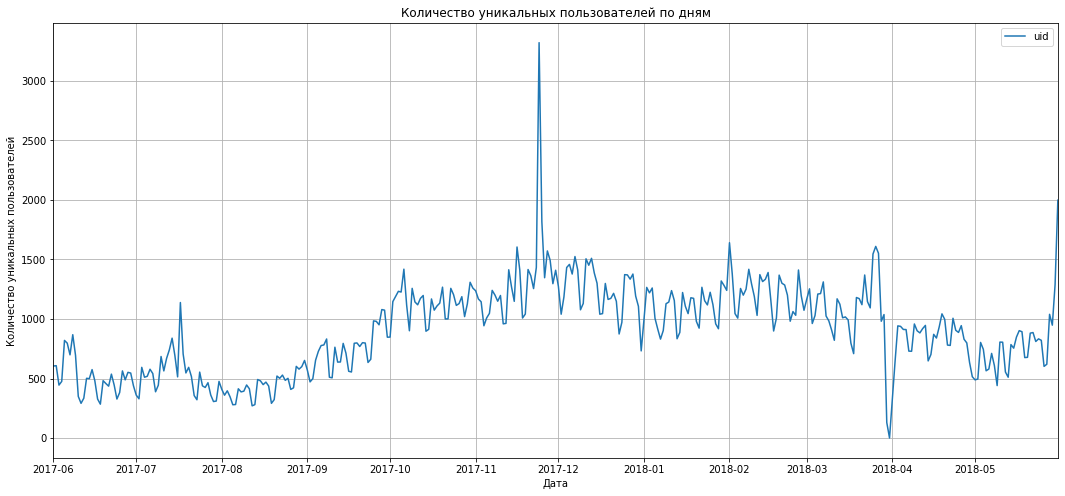

In [30]:
# Построим график зависимости количества уникальных пользователей по дням:
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей по дням');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Дата');
plt.show;

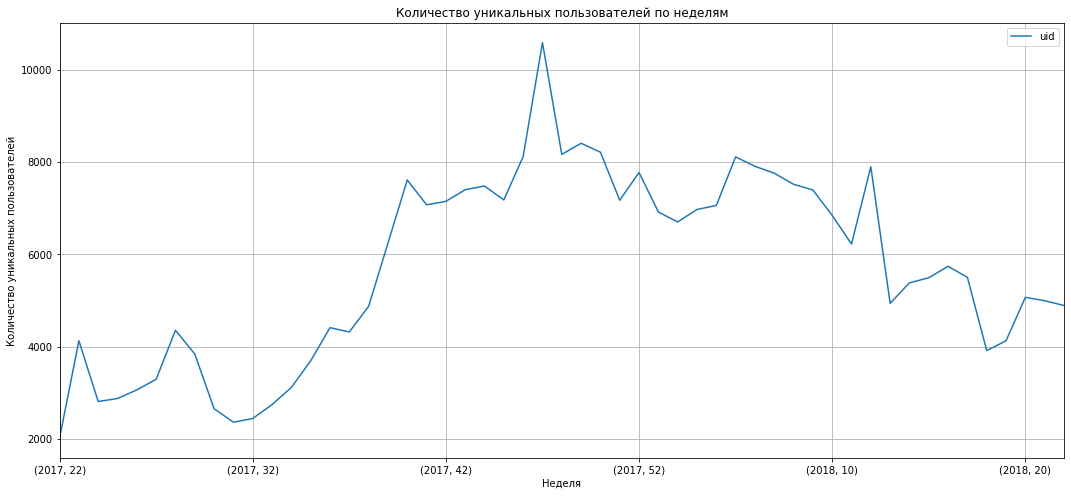

In [31]:
# Построим график зависимости количества уникальных пользователей по неделям:
visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей по неделям');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Неделя');
plt.show;

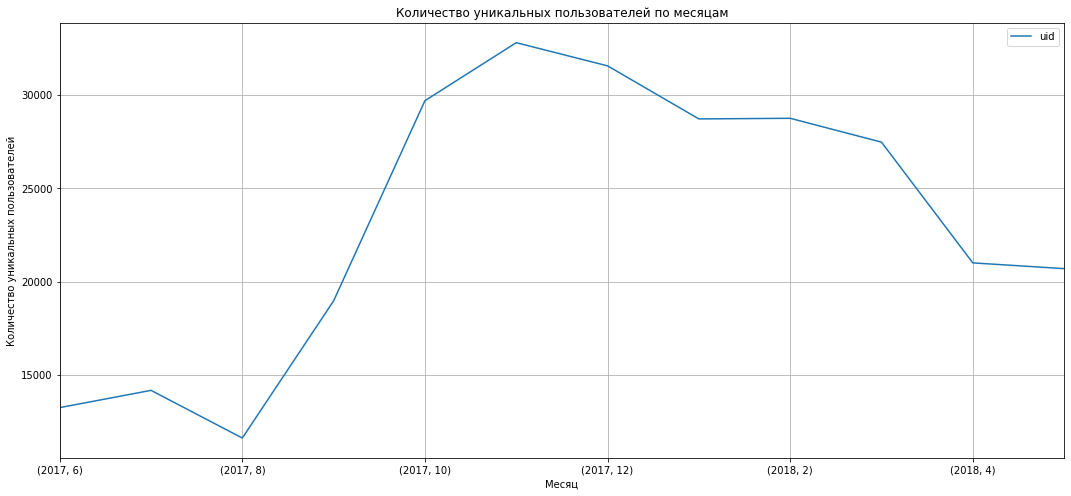

In [32]:
# Построим график зависимости количества уникальных пользователей по месяцам:
visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей по месяцам');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Месяц');
plt.show;

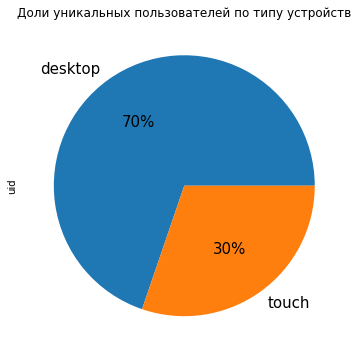

In [33]:
# Доли уникальных пользователей по типу устройств:
(visits
 .groupby('device')
 .agg({'uid':'nunique'})
 .plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False, pctdistance=0.6, figsize=(20,6), legend=False)
);
plt.title('Доли уникальных пользователей по типу устройств')
plt.show();

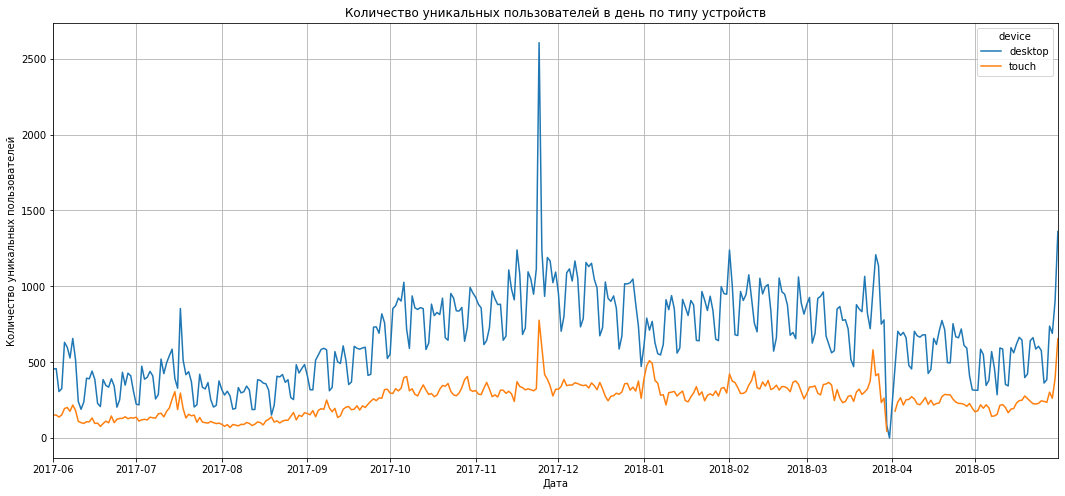

In [34]:
# Построим график зависимости количества уникальных пользователей по дням в разбивке по типу устройства:
visits.pivot_table(index = 'session_date', columns = 'device', values = 'uid', aggfunc = 'nunique')\
.plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в день по типу устройств');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Дата');
plt.show;

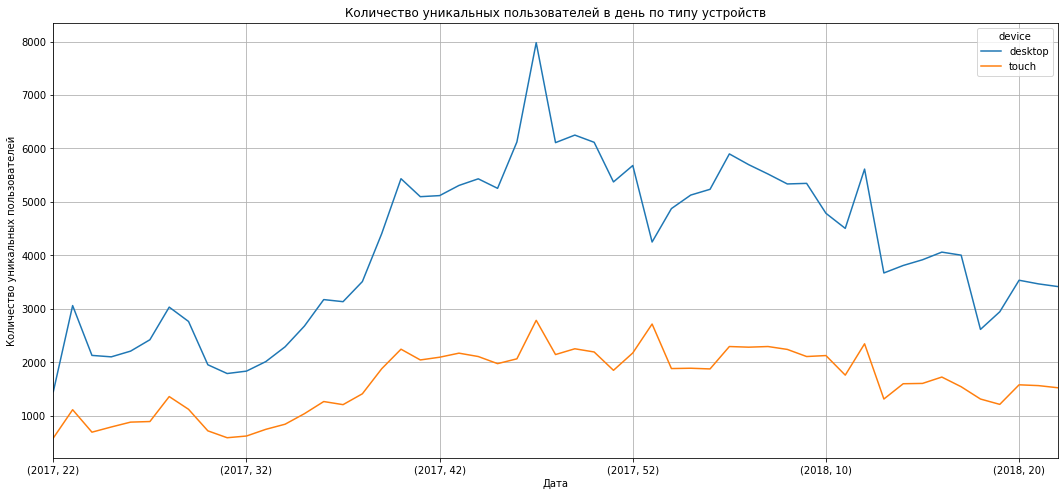

In [35]:
# Построим график зависимости количества уникальных пользователей по дням в разбивке по типу устройства:
visits.pivot_table(index = ['session_year', 'session_week'], columns = 'device', values = 'uid', aggfunc = 'nunique')\
.plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в день по типу устройств');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Дата');
plt.show;

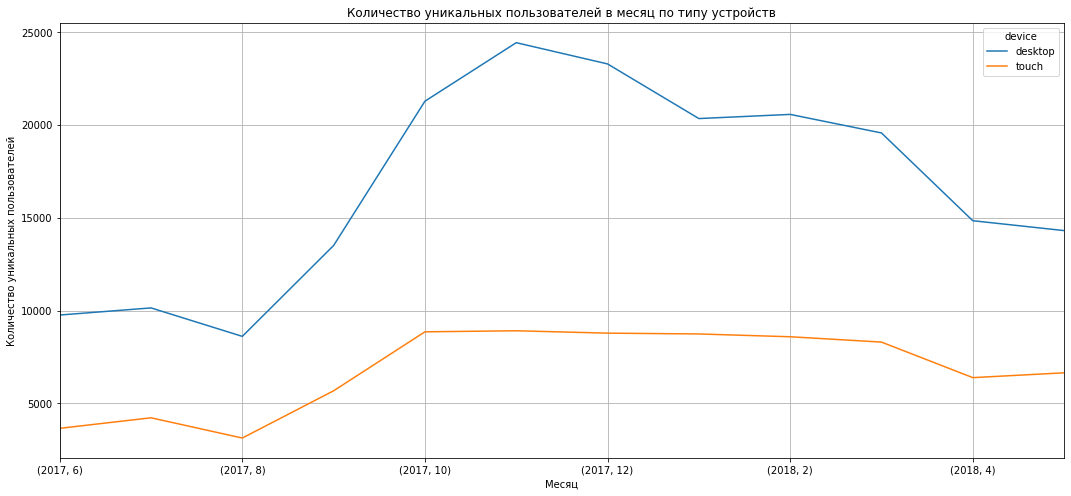

In [36]:
# Построим график зависимости количества уникальных пользователей по месяцам в разбивке по типу устройства:
visits.pivot_table(index =['session_year', 'session_month'], columns = 'device', values = 'uid', aggfunc = 'nunique')\
.plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в месяц по типу устройств');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Месяц');
plt.show;

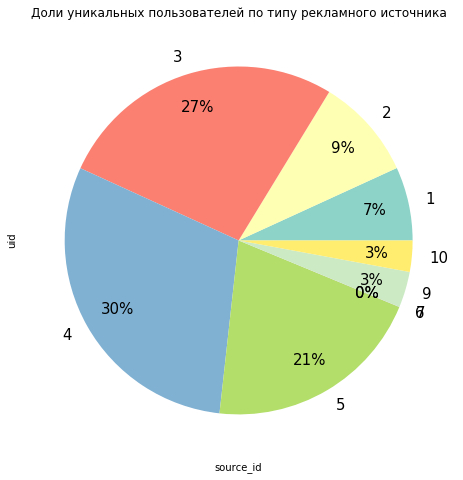

In [37]:
# Доли уникальных пользователей пользователей по типу рекламного источника:
(visits
 .groupby('source_id')
 .agg({'uid':'nunique'})
 .plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False, pctdistance=0.8, figsize=(20,8), legend=False, colormap='Set3')
);
plt.title('Доли уникальных пользователей по типу рекламного источника')
plt.xlabel('source_id');
plt.show();

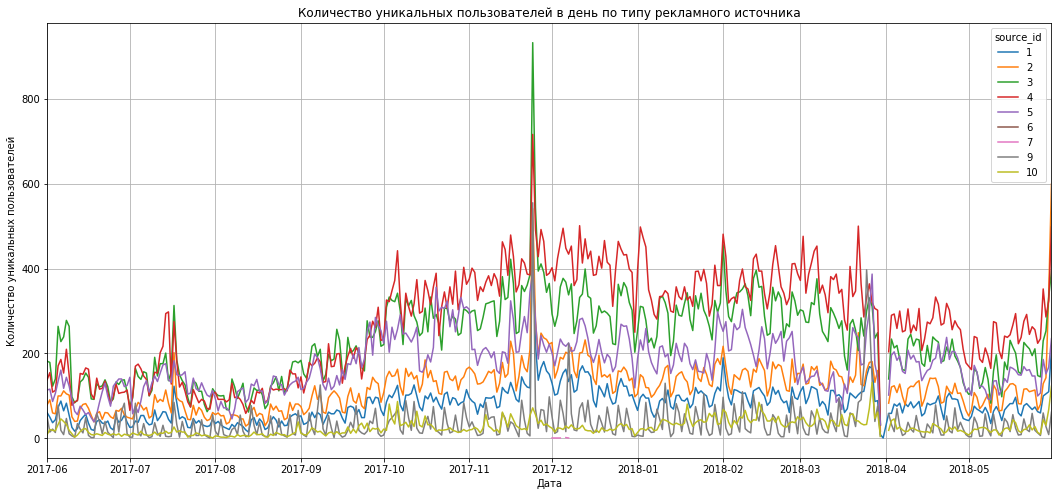

In [38]:
# Количество уникальных пользователей по дням в разбивке по типу рекламного источника
visits.pivot_table(index = 'session_date', columns = 'source_id', values = 'uid', aggfunc = 'nunique').plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в день по типу рекламного источника');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Дата');
plt.show;

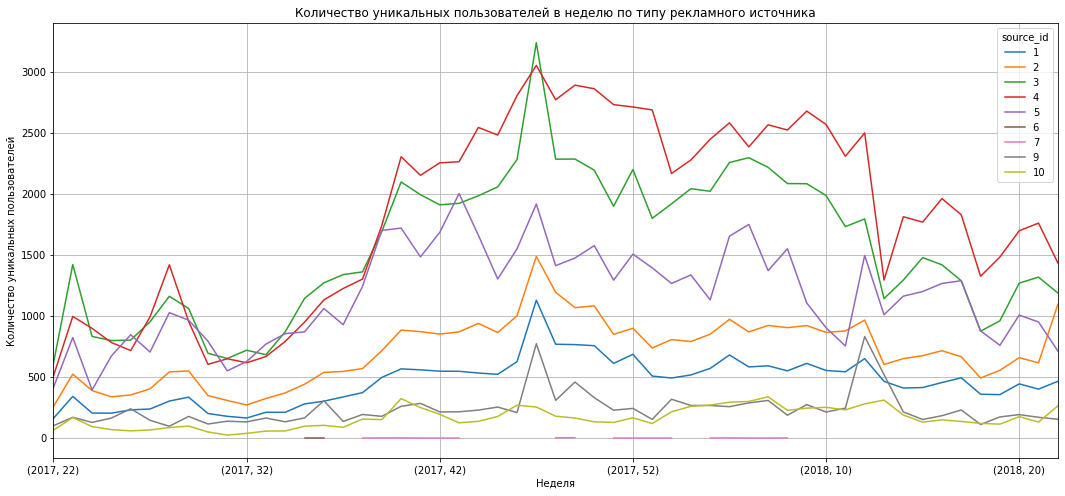

In [39]:
# Количество уникальных пользователей по неделям в разбивке по типу рекламного источника
visits.pivot_table(index = ['session_year', 'session_week'], columns = 'source_id', values = 'uid', aggfunc = 'nunique').plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в неделю по типу рекламного источника');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Неделя');
plt.show;

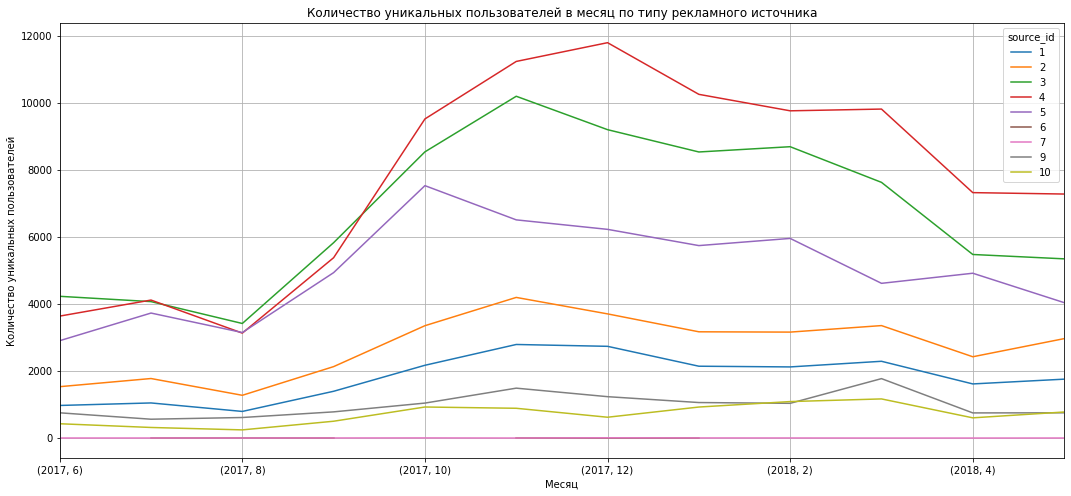

In [40]:
# Количество уникальных пользователей по по месяцам в разбивке по типу рекламного источника
visits.pivot_table(index = ['session_year', 'session_month'], columns = 'source_id', values = 'uid', aggfunc = 'nunique').plot(grid=True, figsize=(18, 8));

plt.title('Количество уникальных пользователей в месяц по типу рекламного источника');
plt.ylabel('Количество уникальных пользователей');
plt.xlabel('Месяц');
plt.show;

Также посчитем показатель sticky factor, который показывает, как часто пользователи обращаются к сайту Яндекс.Афиша.

In [41]:
sticky_mau = dau_total / mau_total * 100
print('Коэффициент вовлеченности за месяц (sticky factor) составляет {:.1f}%'.format(sticky_mau[0]))

Коэффициент вовлеченности за месяц (sticky factor) составляет 3.9%


In [42]:
sticky_wau = dau_total / wau_total * 100
print('Коэффициент вовлеченности за неделю (sticky factor) составляет {:.1f}%'.format(sticky_wau[0]))

Коэффициент вовлеченности за неделю (sticky factor) составляет 15.9%


**Вывод:**

Среднее количество уникальных пользователей в день (DAU) равно 907. Среднее количество уникальных пользователей в недель (WAU) равно 5716. Среднее количество уникальных пользователей в месяц (MAU) - 23228.

Наибольшее количество пользователей пришлось на октябрь - декарбь, максимум был в ноябре.

Большая часть пользователей приходит на сайт Я.Афиша с desktop устройств (70%).

Больше всего пользователей приходят на сайт с 4, 3 и 5 рекламных источников.

Недельные и месячные коэффициент “прилипаемости” (sticky factor) пользователей к сайту Я.Афиша низкие: sticky_mau = 3,9% и sticky_wau = 15,9%. (учитывая, что следующие значения sticky factor говорят о том, что:  sticky_mau = 3% - ни один пользователь не вернулся после первого визита за месяц и sticky_mau = 14%, если ни один пользователь не вернулся после первого визита за неделю). 

<a id='step_2.1.2'></a>

**2.1.2 Сколько сессий в день?**

Определим сколько сессий приходится на одного пользователя в день:

In [43]:
# Сгруппируем визиты по дате и посчитаем общее количество сессий и кол-во уникальных пользователей:
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
# Поделим количество сессий на кол-во уникальны пользователей
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [44]:
print('На одного пользователя в среднем приходится {:.2f} сессий в день'.format(sessions_per_user['sess_per_user'].mean()))

На одного пользователя в среднем приходится 1.08 сессий в день


**Вывод:**
В среднем на одного пользователя приходится 1.08 сессий в день.

**Посмотрим как меняется количество сессий по дням, неделям, месяцам в разбивке по типам устройст:**

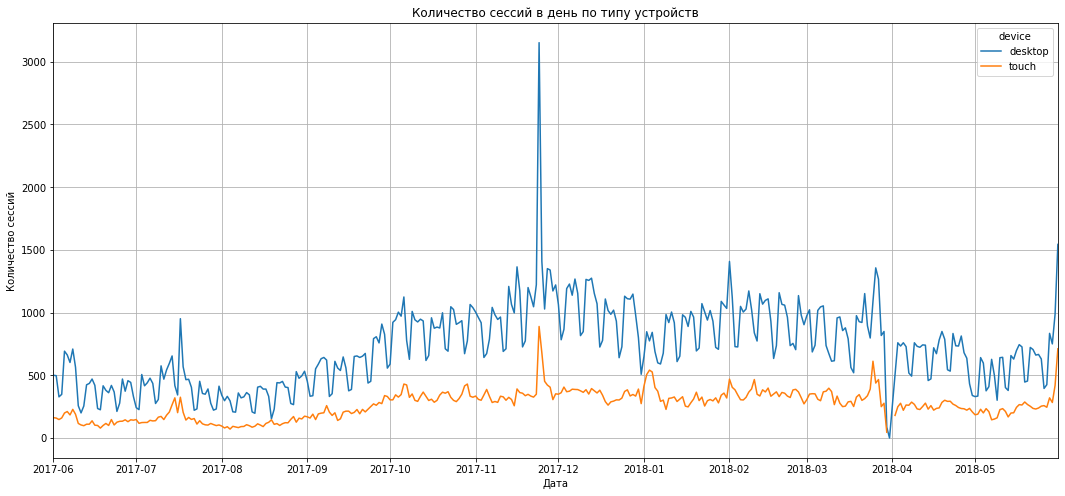

In [45]:
# Количество сессий по дням в разбивке по типу устройства
visits.pivot_table(index = ['session_date'], columns = 'device', values = 'uid', aggfunc = 'count').plot(grid=True, figsize=(18, 8));

plt.title('Количество сессий в день по типу устройств');
plt.ylabel('Количество сессий');
plt.xlabel('Дата');
plt.show;

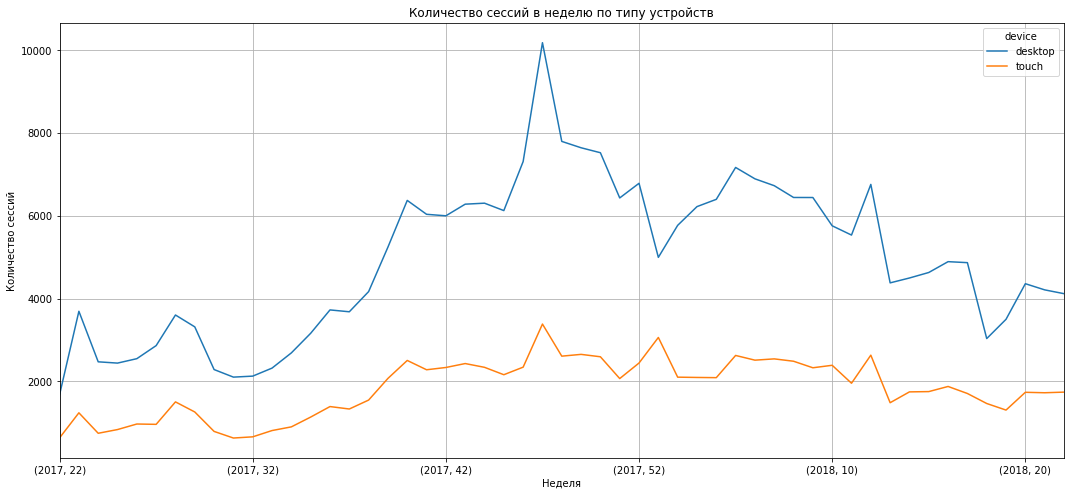

In [46]:
# Количество сессий по неделям в разбивке по типу устройства
visits.pivot_table(index = ['session_year', 'session_week'], columns = 'device', values = 'uid', aggfunc = 'count').plot(grid=True, figsize=(18, 8));

plt.title('Количество сессий в неделю по типу устройств');
plt.ylabel('Количество сессий');
plt.xlabel('Неделя');
plt.show;

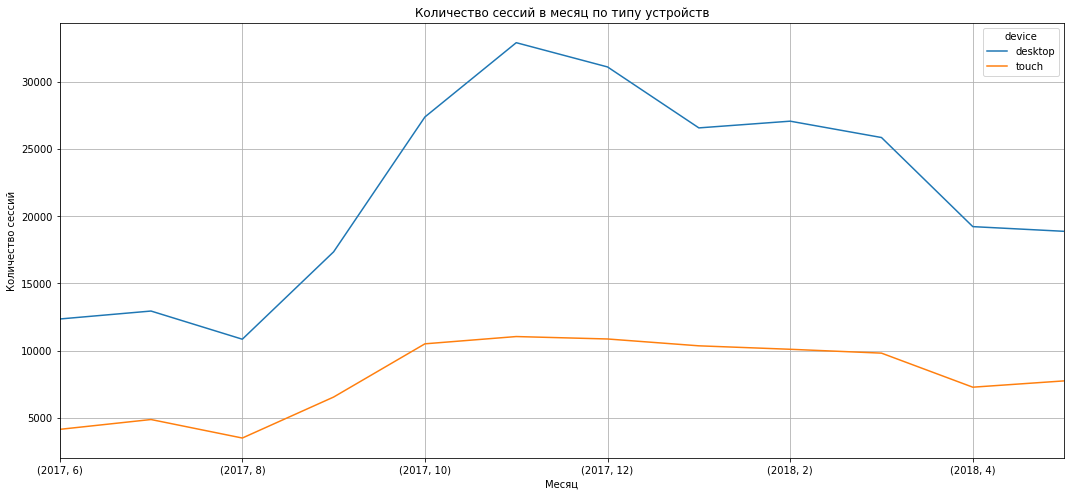

In [47]:
# Количество сессий по месяцам в разбивке по типу устройства
visits.pivot_table(index = ['session_year', 'session_month'], columns = 'device', values = 'uid', aggfunc = 'count').plot(grid=True, figsize=(18, 8));

plt.title('Количество сессий в месяц по типу устройств');
plt.ylabel('Количество сессий');
plt.xlabel('Месяц');
plt.show;

<a id='step_2.1.3'></a>

**2.1.3 Сколько длится одна сессия?**

Определим среднюю продолжительность сессии (ASL), посчитаем длину всех сессий и вычислим среднее:

In [48]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
'Средняя продолжительность сессии на одного пользователя {:.1f} секунды'.format(visits['session_duration_sec'].mean())

'Средняя продолжительность сессии на одного пользователя 643.5 секунды'

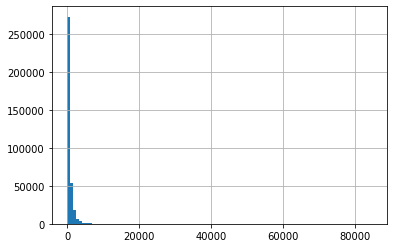

In [49]:
# Посмотрим на распределение:
visits['session_duration_sec'].hist(bins=100);

In [50]:
# Т.к. распределение не является нормальным или близким к нормальному,
# поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего):
asl = visits['session_duration_sec'].mode()
print('Средняя продолжительность сессии одного пользователя (ASL) равна {} секунд'.format(asl[0]))

Средняя продолжительность сессии одного пользователя (ASL) равна 60 секунд


**Вывод:**
Средняя продолжительность сессии (ASL) большинства пользователей на сайте Я.Афиша длится 60 секунд.

<a id='step_2.1.4'></a>

**2.1.4 Как часто люди возвращаются?**

Чтобы опредеелить как часто люди возвращаются на сайт Я.Афиша определим показатель *Retention Rate*

**Retention Rate** показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда был первый визит пользователя на сайте.
Эти данные запишем в объект Series first_visit_date. Объединим его с исходным датафреймом visits:

In [51]:
# Определим дату первого визита пользователя и добавим в исходную таблицу:
first_visit_date = visits.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date,on='uid')

Сформируем когорты по месяцам, т.к. Яндекс Афиша это сервис по продаже билетов (театр, концерты, кино) мы ожидаем, что пользователи посещают сервис хотя бы раз в месяц.

In [52]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_visit_date'].astype('datetime64[M]')

# Для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime']/ np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

# Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# Найдём исходное количество пользователей в когорте, возьмём их число на нулевой месяц:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

# Переименуем столбец uid в cohort_users методом rename(). 
# Параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое название:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

# Рассчитаем Retention Rate. 
# Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Построим сводную таблицу:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07-01,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08-01,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09-01,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10-01,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11-01,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12-01,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02-01,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


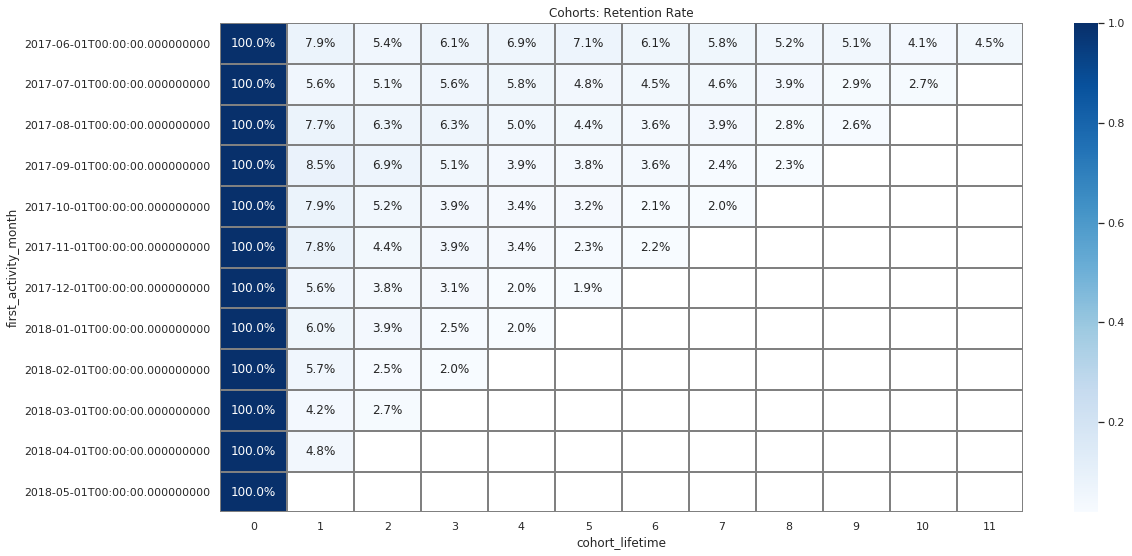

In [53]:
# Визуализируем результаты на тепловой карте:
sns.set(style='white')
plt.figure(figsize=(18, 9))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="Blues");

##### Дополнительно посчитаем и визуализируем Retention Rate по типам источника:

In [54]:
# ТИП УСТРОЙСТВА DESKTOP:
visits_desktop = visits.copy()
visits_desktop = visits_desktop.query('device == "desktop"')

visits_desktop['activity_month'] = visits_desktop['start_ts'].astype('datetime64[M]')
visits_desktop['first_activity_month'] = visits_desktop['first_visit_date'].astype('datetime64[M]')

visits_desktop['cohort_lifetime'] = visits_desktop['activity_month'] - visits_desktop['first_activity_month']
visits_desktop['cohort_lifetime'] = visits_desktop['cohort_lifetime']/ np.timedelta64(1,'M')
visits_desktop['cohort_lifetime'] = visits_desktop['cohort_lifetime'].round().astype('int')

cohorts_desktop = visits_desktop.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count_desktop = cohorts_desktop[cohorts_desktop['cohort_lifetime'] == 0][['first_activity_month','uid']]

initial_users_count_desktop = initial_users_count_desktop.rename(columns={'uid':'cohort_users'})

cohorts_desktop = cohorts_desktop.merge(initial_users_count_desktop,on='first_activity_month')

# Рассчитаем Retention Rate. 
cohorts_desktop['retention'] = cohorts_desktop['uid'] / cohorts_desktop['cohort_users']

# Построим сводную таблицу:
retention_desktop_pivot = cohorts_desktop.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_desktop_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0853396,0.060752,0.068743,0.0759144,0.0818564,0.0672062,0.0642352,0.0588055,0.0565516,0.0451798,0.0482533
2017-07-01,1.0,0.0609966,0.0558419,0.0609966,0.0646478,0.0518686,0.050043,0.0497208,0.0419888,0.0310352,0.0284579,
2017-08-01,1.0,0.0809396,0.0660403,0.067651,0.0544966,0.0468456,0.0374497,0.0405369,0.0314094,0.0292617,,
2017-09-01,1.0,0.0882629,0.0746906,0.0559112,0.0413999,0.0422535,0.0384123,0.0257789,0.0238156,,,
2017-10-01,1.0,0.0829223,0.0550106,0.0401062,0.0369086,0.0350117,0.0229256,0.0223836,,,,
2017-11-01,1.0,0.0804312,0.044811,0.0400417,0.0338318,0.0242933,0.0224055,,,,,
2017-12-01,1.0,0.0526544,0.0383532,0.0306067,0.0200975,0.0200975,,,,,,
2018-01-01,1.0,0.0621165,0.0403568,0.0261244,0.021317,,,,,,,
2018-02-01,1.0,0.0601181,0.0268189,0.020018,,,,,,,,


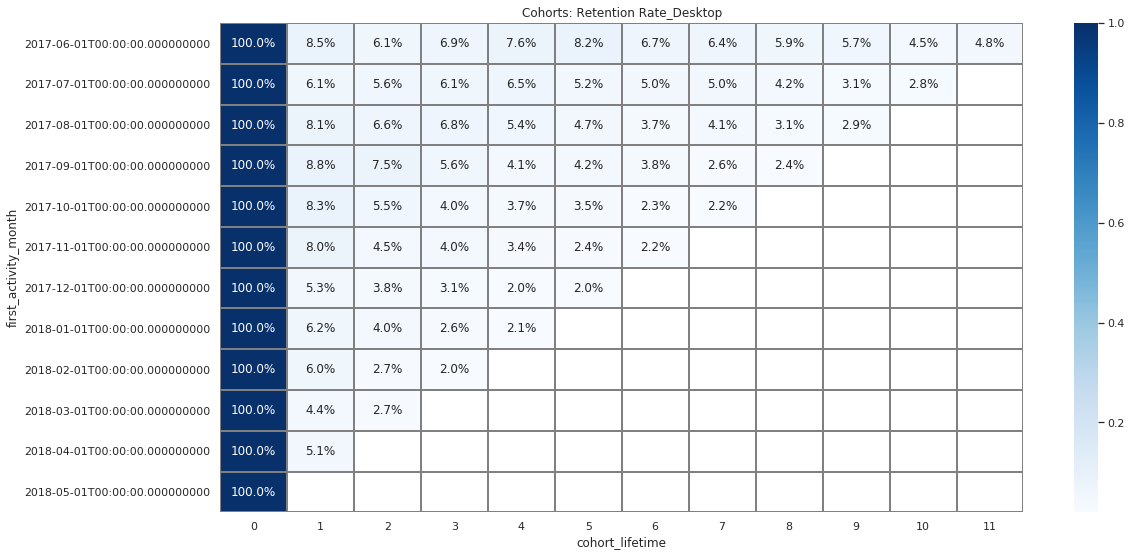

In [55]:
# Визуализируем результаты на тепловой карте:
sns.set(style='white')
plt.figure(figsize=(18, 9))
plt.title('Cohorts: Retention Rate_Desktop')
sns.heatmap(retention_desktop_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="Blues");

In [56]:
# ТИП УСТРОЙСТВА TOUCH:
visits_touch = visits.copy()
visits_touch = visits_touch.query('device == "touch"')

visits_touch['activity_month'] = visits_touch['start_ts'].astype('datetime64[M]')
visits_touch['first_activity_month'] = visits_touch['first_visit_date'].astype('datetime64[M]')

visits_touch['cohort_lifetime'] = visits_touch['activity_month'] - visits_touch['first_activity_month']
visits_touch['cohort_lifetime'] = visits_touch['cohort_lifetime']/ np.timedelta64(1,'M')
visits_touch['cohort_lifetime'] = visits_touch['cohort_lifetime'].round().astype('int')

cohorts_touch = visits_touch.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_cohorts_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['first_activity_month','uid']]

initial_users_cohorts_touch = initial_users_cohorts_touch.rename(columns={'uid':'cohort_users'})

cohorts_touch = cohorts_touch.merge(initial_users_cohorts_touch,on='first_activity_month')

# Рассчитаем Retention Rate. 
cohorts_touch['retention'] = cohorts_touch['uid'] / cohorts_touch['cohort_users']

# Построим сводную таблицу:
retention_touch_pivot = cohorts_touch.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_touch_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.0659371,0.0396717,0.0473324,0.0585499,0.0552668,0.0549932,0.0459644,0.0426813,0.0429549,0.0344733,0.0426813
2017-07-01,1.0,0.0479658,0.0436966,0.0489704,0.0479658,0.04445,0.0376695,0.0379206,0.0349071,0.0246107,0.0273732,
2017-08-01,1.0,0.0711731,0.0575823,0.0554363,0.0407725,0.0400572,0.0354077,0.0396996,0.019671,0.019671,,
2017-09-01,1.0,0.0849406,0.0615624,0.0442237,0.0372102,0.0315605,0.0323398,0.0204559,0.0216248,,,
2017-10-01,1.0,0.0733758,0.0490446,0.0373248,0.0307006,0.0276433,0.0183439,0.016051,,,,
2017-11-01,1.0,0.0777466,0.0449619,0.0363977,0.035461,0.0214104,0.0202061,,,,,
2017-12-01,1.0,0.0666197,0.0384507,0.0333803,0.0201408,0.0169014,,,,,,
2018-01-01,1.0,0.0584212,0.0387575,0.0225135,0.0185238,,,,,,,
2018-02-01,1.0,0.0524465,0.0225608,0.0208028,,,,,,,,


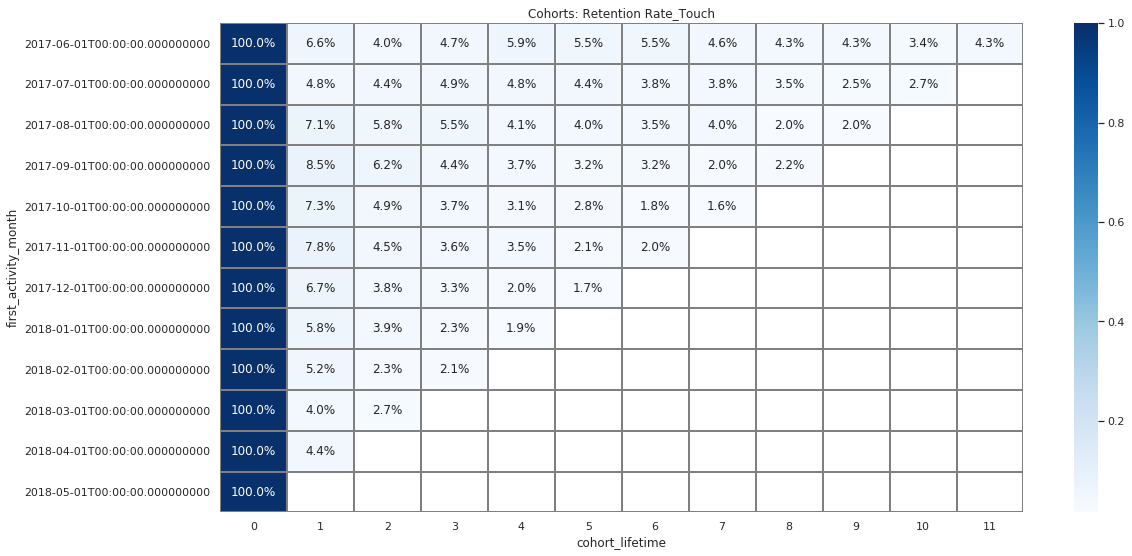

In [57]:
# Визуализируем результаты на тепловой карте:
sns.set(style='white')
plt.figure(figsize=(18, 9))
plt.title('Cohorts: Retention Rate_Touch')
sns.heatmap(retention_touch_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="Blues");

**Выводы:**

Расчитали Retention Rate по месячным когортам и построили тепловую карту.

Retention Rate в первый месяц резко снижается по всем когортам. С каждой новой когортой поведение покупателей практически не меняется.

В первой когорте от июня 2017г. на третий "месяц жизни" начинает незначительно расти на протяжении трех месяцев, но затем снова падает, и в последний 11-ый "месяц жизни" незначительно вырос. Во второй когорте (от июля 2017 г.) был незначительный рост на третий и четвертый "месяц жизни". В третьей когорте (август 2017 г.) был незначительный рост на 7-ой "месяц жизни". Незначительный рост, наблюдамый в первых трех когортах в разные месяцы их жизни, может быть связан, в целом, с более длительным сроком жизни этих покупателей.

Для всех остальных когорт каждый последующий "месяц жизни" Retention Rate падает.

В целом, по всем когортам коэффициент удержания в первый месяц жизни составляет от 4,2 до 8,5%. Это говорит о том, что большая часть пользователей не возвращается на сайт в последующие месяцы.

Также расчитали Retention Rate по типам устройств и построили тепловые карты. Retention Rate у пользователей с типом устройств desktop немного выше, чем у touch. Пользователи с desktop чаше возвращаются на сайт Я.Афиша.

<a id='step_2.1.5'></a>

**2.1.5 Выводы:**

**1. Определили следующие показатели:**

    * Среднее количество уникальных пользователей в день (DAU) равно 907. 
    * Среднее количество уникальных пользователей в недель (WAU) равно 5716. 
    * Среднее количество уникальных пользователей в месяц (MAU) - 23228.
    * Большая часть пользователей приходит на сайт Я.Афиша с desktop устройств (70%).
    * Больше всего пользователей приходят на сайт с 4, 3 и 5 рекламных источников.
    * Недельные и месячные коэффициенты “прилипаемости” (sticky factor) пользователей к сайту Я.Афиша достаточно низкие: sticky_mau = 3,9% и sticky_wau = 15,9%. 

    * В среднем на одного пользователя приходится 1.08 сессий в день.

    * Средняя продолжительность сессии (ASL) большинства пользователей на сайте Я.Афиша длится 60 секунд.


**2. Расчитали Retention Rate по месячным когортам и построили тепловую карту.**

Retention Rate в первый месяц резко снижается по всем когортам. С каждой новой когортой поведение покупателей практически не меняется.

В первой когорте от июня 2017г. на третий "месяц жизни" начинает незначительно расти на протяжении трех месяцев, но затем снова падает, и в последний 11-ый "месяц жизни" незначительно вырос. Во второй когорте (от июля 2017 г.) был незначительный рост на третий и четвертый "месяц жизни". В третьей когорте (август 2017 г.) был незначительный рост на 7-ой "месяц жизни". Незначительный рост, наблюдамый в первых трех когортах в разные месяцы их жизни, может быть связан, в целом, с более длительным сроком жизни этих покупателей.

Для всех остальных когорт каждый последующий "месяц жизни" Retention Rate падает.

В целом, по всем когортам коэффициент удержания в первый месяц жизни составляет от 4,2 до 8,5%. Это говорит о том, что большая часть пользователей не возвращается на сайт в последующие месяцы.

Также расчитали Retention Rate по типам устройств и построили тепловые карты. Retention Rate у пользователей с типом устройств desktop немного выше, чем у touch. Пользователи с desktop чаше возвращаются на сайт Я.Афиша.

<a id='step_2.2'></a>

### 2.2 Продажи:

Определим:

* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

<a id='step_2.2.1'></a>

**2.2.1 Когда люди начинают покупать?**

Чтобы определить когда люди начинают покупать, найдем сколько дней прошло между первым визитом и первым заказом:

In [58]:
# Определим дату первого заказа для пользователей:
first_order = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_order.columns = ['uid', 'first_order_date']

# Определим дату первого визита для пользователей:
first_visit = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visit.columns = ['uid', 'first_visit_date']

# Объеденим таблички по полю 'uid':
first_order_and_visit = first_order.merge(first_visit, on ='uid')

# Расчитаем количество минут и часов между датой первого заказа и датой первого визита:
first_order_and_visit['n_minutes'] = (first_order_and_visit['first_order_date'] - first_order_and_visit['first_visit_date']).astype('timedelta64[m]')
first_order_and_visit['n_hours'] = (first_order_and_visit['first_order_date'] - first_order_and_visit['first_visit_date']).astype('timedelta64[h]')

# Расчитаем количество дней между датой первого заказа и датой первого визита:
first_order_and_visit['first_order_date'] = first_order_and_visit['first_order_date'].astype('datetime64[D]')
first_order_and_visit['first_visit_date'] = first_order_and_visit['first_visit_date'].astype('datetime64[D]')
first_order_and_visit['n_days'] = first_order_and_visit['first_order_date'] - first_order_and_visit['first_visit_date']
first_order_and_visit['n_month'] = (first_order_and_visit['n_days'] / np.timedelta64(1,'M')).round()
first_order_and_visit

,uid,first_order_date,first_visit_date,n_minutes,n_hours,n_days,n_month
0,313578113262317,2018-01-03,2017-09-18,154022.0,2567.0,107 days,4.0
1,1575281904278712,2017-06-03,2017-06-03,0.0,0.0,0 days,0.0
2,2429014661409475,2017-10-11,2017-10-11,79.0,1.0,0 days,0.0
3,2464366381792757,2018-01-28,2018-01-27,1184.0,19.0,1 days,0.0
4,2551852515556206,2017-11-24,2017-11-24,0.0,0.0,0 days,0.0
...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-11-24,2017-08-20,137973.0,2299.0,96 days,3.0
36519,18445407535914413204,2017-09-22,2017-09-22,7.0,0.0,0 days,0.0
36520,18445601152732270159,2018-03-26,2017-08-07,333303.0,5555.0,231 days,8.0
36521,18446156210226471712,2018-02-18,2017-11-07,148893.0,2481.0,103 days,3.0


In [59]:
# определим сколько человек сделали заказ в свой первый день визита:
first_order_and_visit['n_days'].value_counts()

0 days      25039
1 days       1966
2 days        685
3 days        452
4 days        386
            ...  
307 days        1
350 days        1
358 days        1
342 days        1
318 days        1
Name: n_days, Length: 349, dtype: int64

In [60]:
# Определим через сколько часов пользователи делали заказ, для тех у кто сделал заказ в свой первый визит:
first_order_and_visit['n_hours'].value_counts().head(10)

0.0     22582
1.0      1051
2.0       474
3.0       286
4.0       199
24.0      157
5.0       148
23.0      142
22.0      136
21.0      124
Name: n_hours, dtype: int64

In [61]:
# определим сколько человек сделали заказ в свой первый месяц визита:
first_order_and_visit['n_month'].value_counts()

0.0     30426
1.0      1924
2.0      1148
3.0       787
4.0       659
5.0       501
6.0       386
7.0       261
8.0       184
9.0       114
10.0       63
11.0       57
12.0       13
Name: n_month, dtype: int64

In [62]:
# Определим через сколько минут пользователи делали заказ, для тех у кто сделал заказ в свой первый визит:
first_order_and_visit['n_minutes'].value_counts().head(25)

1.0     2656
0.0     2455
2.0     2098
3.0     1685
4.0     1460
5.0     1204
6.0     1077
7.0      970
8.0      793
9.0      742
10.0     596
11.0     531
12.0     529
13.0     438
14.0     392
15.0     361
16.0     347
17.0     303
19.0     279
18.0     272
20.0     246
21.0     213
22.0     187
24.0     171
23.0     161
Name: n_minutes, dtype: int64

**Вывод:**
Определили для каждого пользователя время между первым заказом и первым визитом на сайт. 

Почти 69% покупателей сайта Я.Афиша делают свою первую покупку в свой первый визит на сайт и 83% покупателей совершают первую покупку в течение первого месяца.

Большинство пользователей (61,8%) делают заказ в течение первого часа с начала своего первого визита. В ту же минуту делают заказ - 2455 пользователей, в течение 1ой минуты делают заказ - 2656 пользователей, в течение 2ой минуты - 2098 пользователей.

<a id='step_2.2.2'></a>

**2.2.2 Сколько раз покупают за период?**

In [63]:
# Определим сколько в среднем за день, неделю и месяц пользователи делают заказы:
orders['buy_year'] = orders['buy_ts'].dt.year
orders['buy_month'] = orders['buy_ts'].dt.month
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_date'] = orders['buy_ts'].dt.date

orders_per_day = orders.groupby('buy_date').agg({'uid': 'count'}).mean().astype('int64')
orders_per_week = orders.groupby(['buy_year', 'buy_week']).agg({'uid': 'count'}).mean().astype('int64')
orders_per_month = orders.groupby(['buy_year', 'buy_month']).agg({'uid': 'count'}).mean().astype('int64')

print('Среднее количество заказов в день равно {}'.format(orders_per_day[0]))
print('Среднее количество заказов в неделю равно {}'.format(orders_per_week[0]))
print('Среднее количество заказов в месяц  равно {}'.format(orders_per_month[0]))

Среднее количество заказов в день равно 138
Среднее количество заказов в неделю равно 951
Среднее количество заказов в месяц  равно 3878


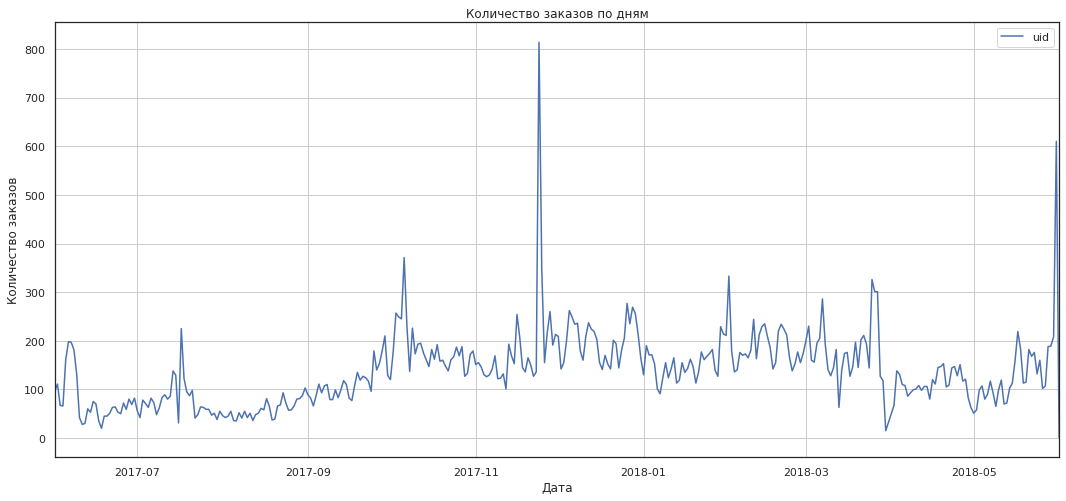

In [64]:
# График зависимости количества заказов по дням
orders.groupby('buy_date').agg({'uid': 'count'}).plot(grid=True, figsize=(18, 8));
plt.title('Количество заказов по дням');
plt.ylabel('Количество заказов');
plt.xlabel('Дата');
plt.show;

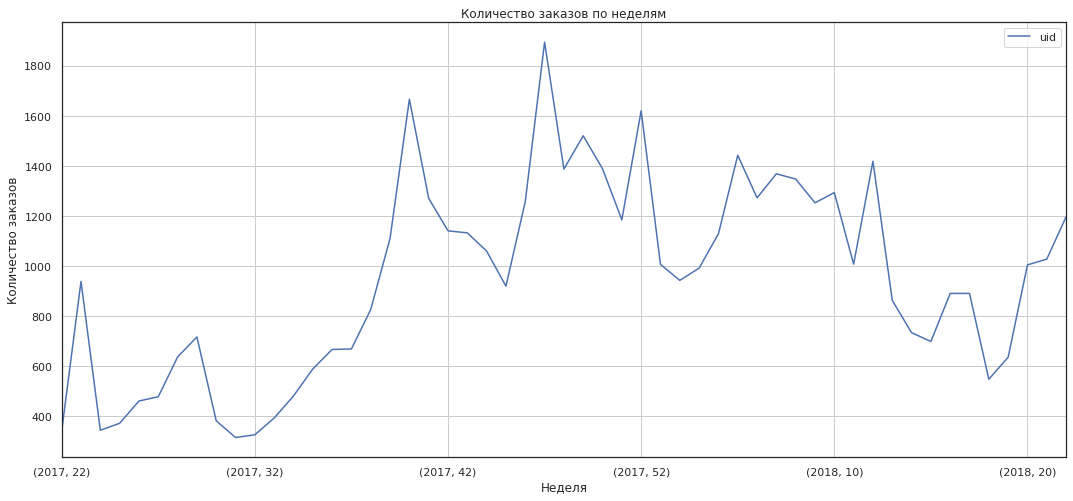

In [65]:
# График зависимости количества заказов по неделям
orders.groupby(['buy_year', 'buy_week']).agg({'uid': 'count'}).plot(grid=True, figsize=(18, 8));
plt.title('Количество заказов по неделям');
plt.ylabel('Количество заказов');
plt.xlabel('Неделя');
plt.show;

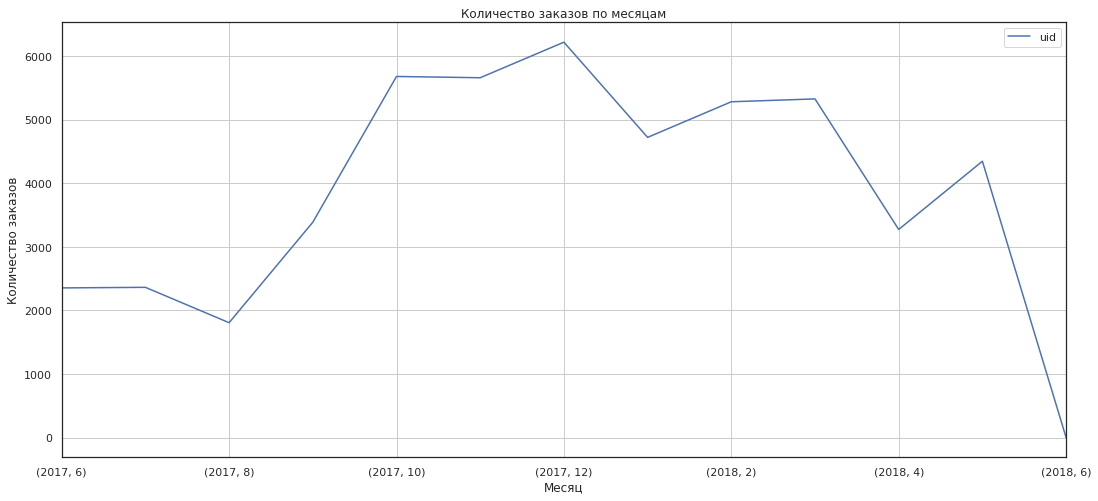

In [66]:
# График зависимости количества заказов по месяцам
orders.groupby(['buy_year', 'buy_month']).agg({'uid': 'count'}).plot(grid=True, figsize=(18, 8));
plt.title('Количество заказов по месяцам');
plt.ylabel('Количество заказов');
plt.xlabel('Месяц');
plt.show;

Чтобы определить сколько раз покупают за период сгруппируем данные по когорте first_order_month и месяцу совершения заказа order_month:

In [67]:
first_order_date = orders.groupby('uid')['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')

orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [68]:
orders_pivot = orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique')
orders_pivot.fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023,61,50,54,88,67,62,47,58,45,45,53,
2017-07-01,,1923,52,57,64,49,38,36,39,42,22,26,
2017-08-01,,,1370,58,53,44,40,32,30,44,19,31,
2017-09-01,,,,2581,130,100,74,52,64,66,37,43,
2017-10-01,,,,,4340,206,123,92,93,72,56,67,
2017-11-01,,,,,,4081,222,120,106,81,48,62,
2017-12-01,,,,,,,4383,146,103,97,50,63,
2018-01-01,,,,,,,,3373,114,83,43,45,
2018-02-01,,,,,,,,,3651,118,58,39,


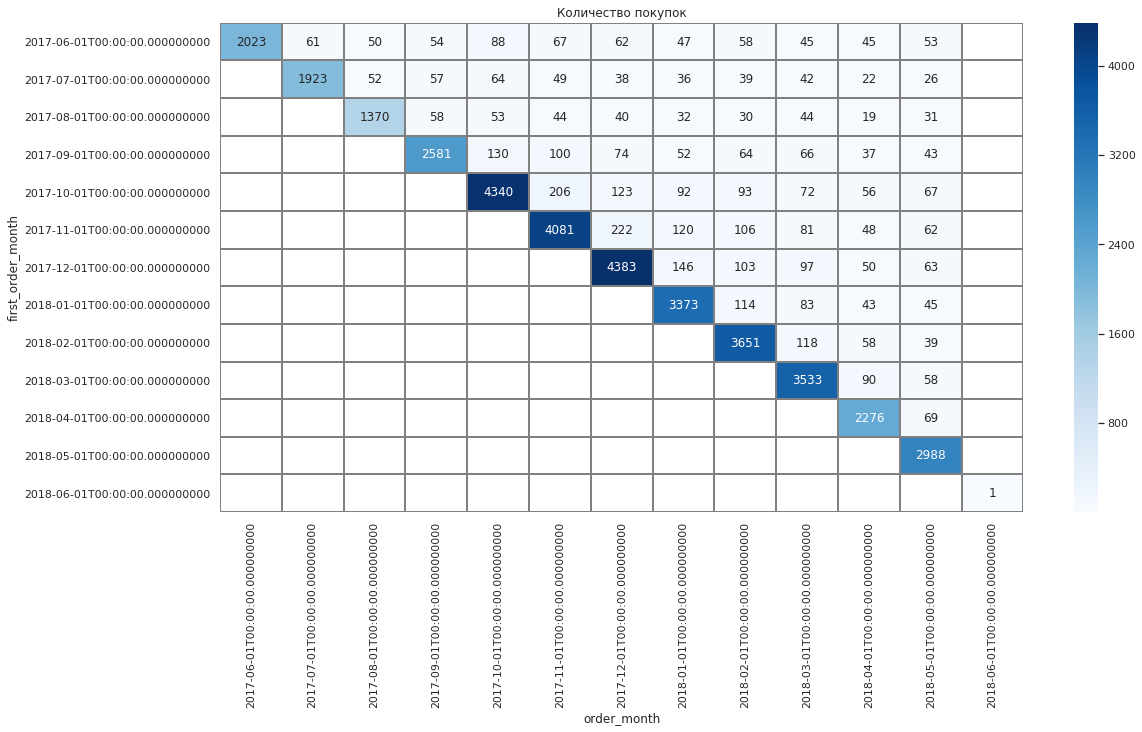

In [69]:
plt.figure(figsize=(18, 9))
plt.title('Количество покупок')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray', cmap="Blues");

**Вывод:**

Среднее количество заказов в день равно 138, в неделю - 951, в месяц - 3878 заказов. Больше всего заказов было сделано в период с октября по декабрь.

Когортный анализ по месяцам показал, что большинство пользователей совершают покупки в тот же месяц, когда был сделан первый заказ.

<a id='step_2.2.3'></a>

**2.2.3 Средний чек**

In [70]:
# Определим средний чек среди всех пользователей, сделавших заказ:
orders['revenue'].mean()

4.999646930477041

In [71]:
# Сгруппируем данные по когорте first_order_month и месяцу совершения заказа order_month:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
# Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts

,first_order_month,order_month,revenue,uid,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591
...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897
75,2018-04-01,2018-04-01,10600.69,2276,4.657597
76,2018-04-01,2018-05-01,1209.92,69,17.535072
77,2018-05-01,2018-05-01,13925.76,2988,4.660562


In [72]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [73]:
revenue_per_user_mean = orders_grouped_by_cohorts['revenue_per_user'].mean()
print('Средний чек покупателей по когортам равен {:.2f}'.format(revenue_per_user_mean))

Средний чек покупателей по когортам равен 14.73


In [74]:
# Определим средний чек среди всех пользователей, сделавших заказ:
print('Средний чек покупателей равен {:.2f}'.format(orders['revenue'].mean()))

Средний чек покупателей равен 5.00


Определим увеличивается или уменьшается средний чек покупателей, которые продолжают делать заказы на Я.Афише.

In [75]:
# Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки:
orders_grouped_by_cohorts_pivot = (orders_grouped_by_cohorts
                                   .pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')
                                  )
orders_grouped_by_cohorts_pivot.fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.72441,16.0954,17.7068,35.7648,23.5066,22.2078,31.0119,25.0332,19.2957,27.2336,25.6813,9.80415,
2017-07-01,,6.01022,12.3963,21.036,10.7861,6.93816,7.89684,6.42111,6.99282,7.38214,12.8618,11.5138,
2017-08-01,,,5.27652,11.1488,11.8513,12.183,16.9212,12.1391,9.62033,12.6105,21.07,8.30742,
2017-09-01,,,,5.64453,22.1884,13.4452,138.669,19.8815,26.095,27.4371,16.9614,11.0447,
2017-10-01,,,,,5.00373,11.2874,6.75325,7.41315,7.0728,7.25514,6.57321,7.4797,
2017-11-01,,,,,,5.15468,7.33905,6.78658,12.5107,7.45728,4.58083,7.56484,
2017-12-01,,,,,,,4.73819,7.81658,39.366,48.1351,27.4314,23.5184,
2018-01-01,,,,,,,,4.13564,8.72123,12.3655,11.1998,4.69956,
2018-02-01,,,,,,,,,4.15699,8.61,4.94241,6.94103,


Оценим, как изменяется средний чек в зависимости от времени, прошедшего с момента первой покупки. 

In [76]:
# Найдём lifetime когорты. Из месяца совершения заказа order_month вычтем месяц когорты first_order_month:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']

# Преобразуем столбец cohort_lifetime с типом timedelta в число месяцев, прошедших между датами: 
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

# Округлим значения столбца cohort_lifetime методом round(), а затем приведём их к целочисленному типу методом astype('int'):
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

# Применим метод dt.strftime() — он превращает объект Series с типом datetime в строку в формате даты:
orders_grouped_by_cohorts['first_order_month'].dt.strftime('%d.%m.%Y')

# Оставим в данных о месяце первого заказа только год и месяц:
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')
orders_grouped_by_cohorts

,index,first_order_month,order_month,revenue,uid,revenue_per_user,cohort_lifetime
0,0,2017-06,2017-06-01,9557.49,2023,4.724414,0
1,1,2017-06,2017-07-01,981.82,61,16.095410,1
2,2,2017-06,2017-08-01,885.34,50,17.706800,2
3,3,2017-06,2017-09-01,1931.30,54,35.764815,3
4,4,2017-06,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...,...
74,74,2018-03,2018-05-01,1114.87,58,19.221897,2
75,75,2018-04,2018-04-01,10600.69,2276,4.657597,0
76,76,2018-04,2018-05-01,1209.92,69,17.535072,1
77,77,2018-05,2018-05-01,13925.76,2988,4.660562,0


Построим сводную таблицу изменения среднего чека, где в столбцах будет lifetime, а строках — когорты:

In [77]:
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')
revenue_per_user_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.0954,17.7068,35.7648,23.5066,22.2078,31.0119,25.0332,19.2957,27.2336,25.6813,9.80415
2017-07,6.010218,12.3963,21.036,10.7861,6.93816,7.89684,6.42111,6.99282,7.38214,12.8618,11.5138,
2017-08,5.276518,11.1488,11.8513,12.183,16.9212,12.1391,9.62033,12.6105,21.07,8.30742,,
2017-09,5.644529,22.1884,13.4452,138.669,19.8815,26.095,27.4371,16.9614,11.0447,,,
2017-10,5.003733,11.2874,6.75325,7.41315,7.0728,7.25514,6.57321,7.4797,,,,
2017-11,5.154683,7.33905,6.78658,12.5107,7.45728,4.58083,7.56484,,,,,
2017-12,4.738191,7.81658,39.366,48.1351,27.4314,23.5184,,,,,,
2018-01,4.135636,8.72123,12.3655,11.1998,4.69956,,,,,,,
2018-02,4.156987,8.61,4.94241,6.94103,,,,,,,,


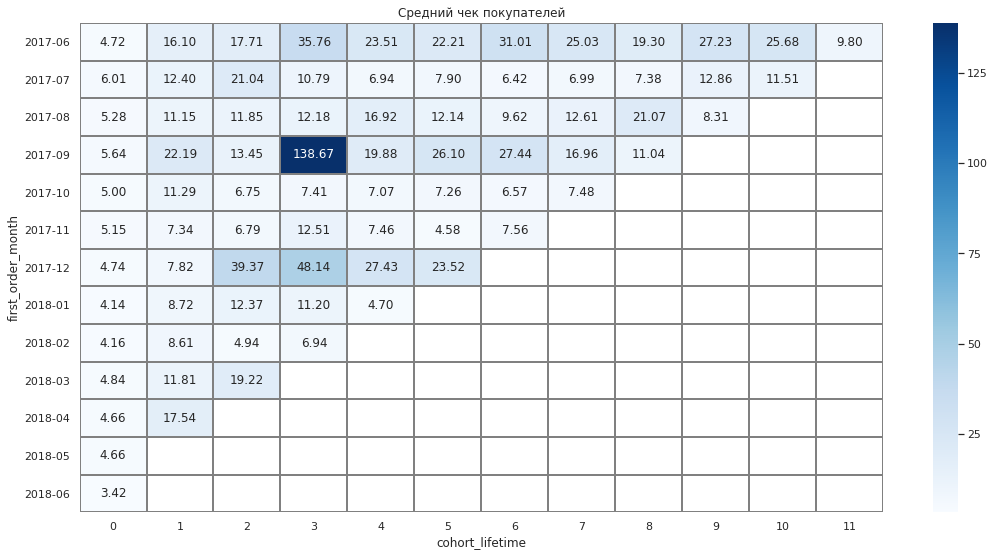

In [78]:
plt.figure(figsize=(18, 9))
plt.title('Средний чек покупателей')
sns.heatmap(revenue_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="Blues");

**Вывод:**

Определили средний чек покупалетей и изменение среднего чека в зависимости от времени, прошедшего с момента первой покупки по когортам. Визуализировали данные на тепловой карте.

Средний чек по всем заказам равен 5. Средний чек покупателей по когортам по равен 14.73.

Во всех когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. 

Самый большой средний чек был в четвертой когорте (сентябрь 2017г.) на третьем "месяце жизни" после первой покупки и составил 138,67.

Для первой, четвертой, шестой и седьмой когорт максимальное значение среднего чека пришлось на третий месяц жизни.
Во второй когорте (июль 2017г.) максимальное значение среднего чек было на второй месяц жизни, а в третей когорте (август 2017г.) - на 8 месяц жизни.
В седьмой когорте (декабрь 2017г.) на второй и третий месяц жизни был стремительный рост среднего чека.

В целом, средний чек покупателей в течение времени жизни у каждой когорты меняется как в сторону роста так и в сторону снижения.

<a id='step_2.2.4'></a>

**2.2.4 Сколько денег приносят? (LTV)**

Расчитаем показатель **LTV** — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок.


In [79]:
# Даты по расходам и заказам должны совпадать по датам. В таблице orders исключим заказы за июнь 2018.
#orders = orders.query('order_month < "2018-06-01"')
#orders

In [80]:
# Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [81]:
# Для расчета LTV необходимы данные о маржинальности проекта. Поскольку эти данные отсутствуют, примем за единицу:
margin_rate = 1

In [82]:
# Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [83]:
# Найдём LTV.Разделим валовую прибыль когорт за каждый месяц на общее число пользователей 
# в каждой когорте:

report['ltv'] = report['gp'] / report['n_buyers']

# Визуализируем когорты в виде сводной таблицы:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


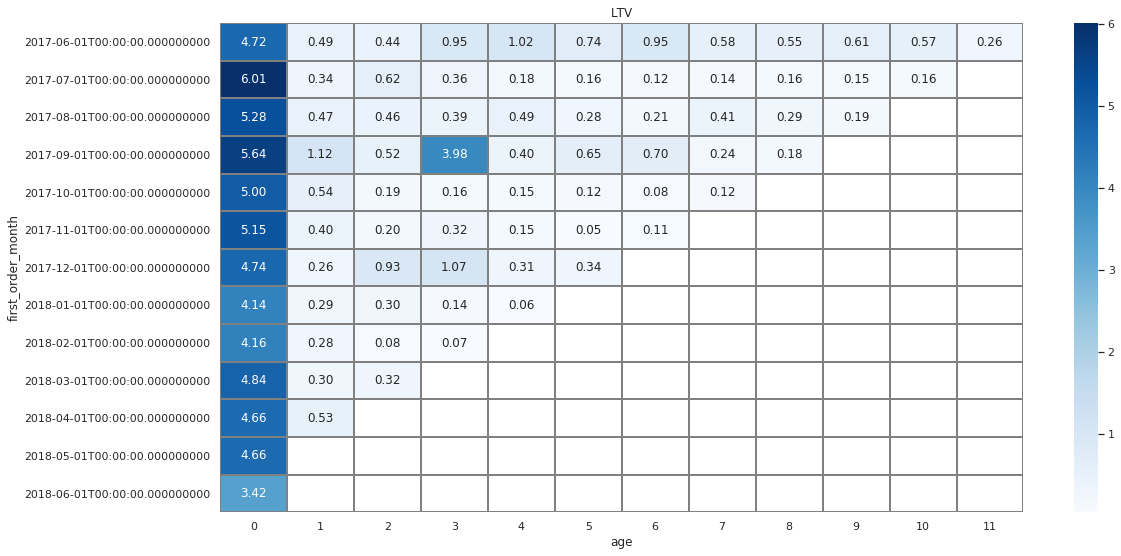

In [84]:
# Визуализируем данные по LTV на тепловой карте:
plt.figure(figsize=(18, 9))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="Blues");

In [85]:
# посчитаем LTV каждой когорты, просуммируем их LTV:
output.sum(axis=1)

first_order_month
2017-06-01    11.88
2017-07-01     8.40
2017-08-01     8.47
2017-09-01    13.43
2017-10-01     6.36
2017-11-01     6.38
2017-12-01     7.65
2018-01-01     4.93
2018-02-01     4.59
2018-03-01     5.46
2018-04-01     5.19
2018-05-01     4.66
2018-06-01     3.42
dtype: float64

In [86]:
# посчитайте накопительный LTV за 11 месяцев после первой покупки:
m6_cum_ltv = output.cumsum(axis=1).mean(axis=0)[10]
print('Накопительный LTV средней когорты за 11 месяцев жизни после первой покупки: {:.2f}'.format(m6_cum_ltv))

Накопительный LTV средней когорты за 11 месяцев жизни после первой покупки: 10.01


**Вывод:**

Посчитали LTV по когортам и возрасту когорты. Визуализировали данные на тепловой карте. Также посчитали суммарный LTV для каждой когорты.

Самый высокий показатель LTV у когорты "сентябрь 2017г." - 13,43. Также у этой когорты на третий месяц после первого заказа самый высокий LTV по сравнению с другими когортами (по возрасту когорт от 1 до 11).

У когорты "июнь 2017г." LTV равен 11,88.

Накопительный LTV средней когорты за 11 месяцев после первой покупки составляет 10,01.

<a id='step_2.2.5'></a>

**2.2.5 Выводы:**

1. Определили для каждого пользователя время между первым заказом и первым визитом на сайт. Почти 69% покупателей сайта Я.Афиша делают свою первую покупку в свой первый визит на сайт и 83% покупателей совершают первую покупку в течение первого месяца.

2. Когортный анализ по месяцам показал, что большинство пользователей совершают покупки в тот же месяц, когда был сделан первый заказ.
3. Средний чек покупателей равен 14.73. Во всех когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. Самый большой средний чек был в четвертой когорте (сентябрь 2017г.) на третьем "месяце жизни" после первой покупки и составил 138,67.

Для первой, четвертой, шестой и седьмой когорт максимальное значение среднего чека пришлось на третий месяц жизни.
Во второй когорте (июль 2017г.) максимальное значение среднего чек было на второй месяц жизни, а в третей когорте (август 2017г.) - на 8 месяц жизни. В седьмой когорте (декабрь 2017г.) на второй и третий месяц жизни был стремительный рост среднего чека.

В целом, средний чек покупателей в течение времени жизни у каждой когорты меняется как в сторону роста так и в сторону снижения.

4. Посчитали LTV по когортам и возрасту когорты. Также посчитали суммарный LTV для каждой когорты.

    * для когорты 2017-06-01  LTV равно  11.88
    * для когорты 2017-07-01  LTV равно  8.40
    * для когорты 2017-08-01  LTV равно  8.47
    * для когорты 2017-09-01  LTV равно  13.43
    * для когорты 2017-10-01  LTV равно  6.36
    * для когорты 2017-11-01  LTV равно  6.38
    * для когорты 2017-12-01  LTV равно  7.65
    * для когорты 2018-01-01  LTV равно  4.93
    * для когорты 2018-02-01  LTV равно  4.59
    * для когорты 2018-03-01  LTV равно  5.46
    * для когорты 2018-04-01  LTV равно  5.19
    * для когорты 2018-05-01  LTV равно  4.66


Самый высокий показатель LTV у когорты "сентябрь 2017г." - 13,43. Также у этой когорты на третий месяц самый высокий LTV по сравнению с другими когортами (для возраста от 1 до 11). У когорты "июнь 2017г." LTV равен 11,88.

Накопительный LTV средней когорты за 11 месяцев после первой покупки составляет 10,01.

<a id='step_2.3'></a>

### 2.3 Маркетинг:
* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROI)
* Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

<a id='step_2.3.1'></a>

**2.3.1 Сколько денег потратили? Всего / на каждый источник / по времени**

In [87]:
# Рассчитаем суммарные затраты за весь период:
costs_sum = costs['costs'].sum()
print('Всего затраты на рекламу за весь период составили {}'.format(costs_sum))

Всего затраты на рекламу за весь период составили 329131.62


In [88]:
# Рассчитаем суммарные затраты по месяцам:
costs['data'] = costs['dt'].astype('datetime64[M]')
costs_per_time = costs.groupby('data').agg({'costs': 'sum'}).reset_index()
costs_per_time

,data,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [89]:
'Средние затраты на рекламу в месяц за весь период составили {}'.format(costs_per_time['costs'].mean().round(2))

'Средние затраты на рекламу в месяц за весь период составили 27427.63'

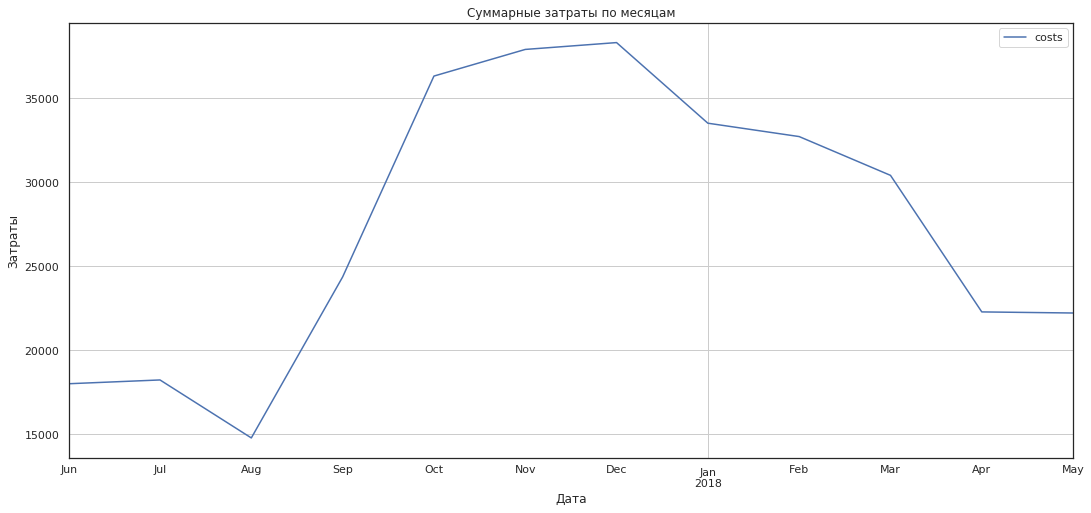

In [90]:
# Построим график зависимости затрат по месяцам:
costs.groupby('data').agg({'costs': 'sum'}).plot(grid=True, figsize=(18, 8));

plt.title('Суммарные затраты по месяцам');
plt.ylabel('Затраты');
plt.xlabel('Дата');
plt.show;

In [91]:
# Рассчитаем суммарные затраты по источникам:
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


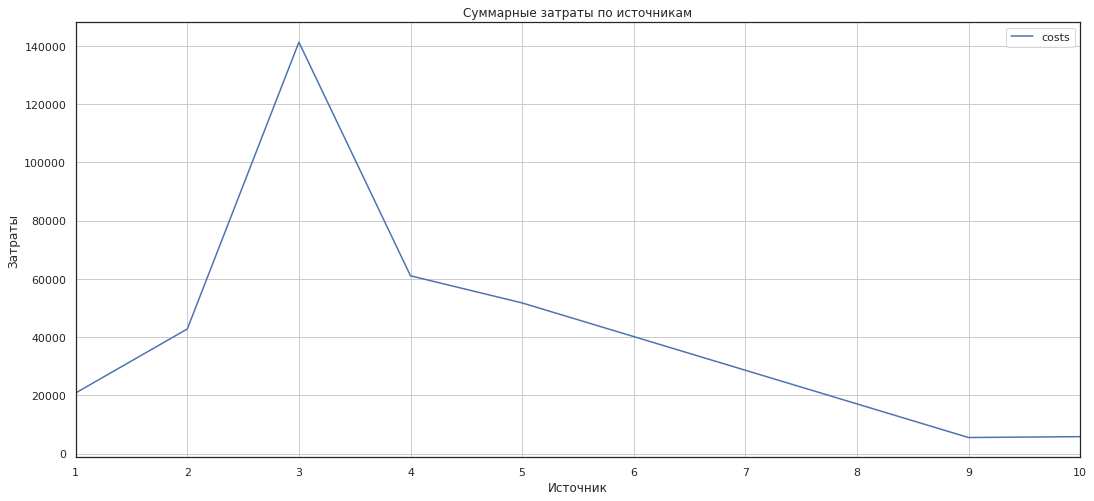

In [92]:
# Построим график зависимости затрат по источникам:
costs.groupby('source_id').agg({'costs': 'sum'}).plot(grid=True, figsize=(18, 8))

plt.title('Суммарные затраты по источникам');
plt.ylabel('Затраты');
plt.xlabel('Источник');
plt.show;

In [93]:
# Рассчитаем суммарные затраты по месяцам и по источникам:
costs_per_source_month = costs.groupby(['data','source_id']).agg({'costs': 'sum'}).reset_index()
costs_per_source_month

,data,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


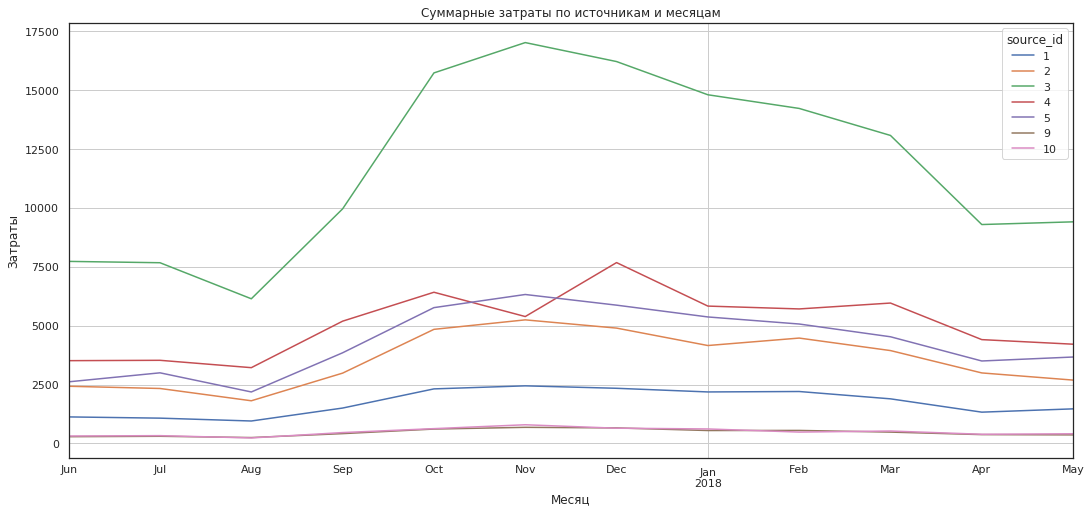

In [94]:
# Построим график зависимости затрат по источникам и времени:
costs.pivot_table(index = 'data', columns = 'source_id', values = 'costs', aggfunc = 'sum').plot(grid=True, figsize=(18, 8));

plt.title('Суммарные затраты по источникам и месяцам');
plt.ylabel('Затраты');
plt.xlabel('Месяц');
plt.show;

**Вывод:**

Определили, что суммарные затраты на рекламу за весь период составили 329131,62. 

Также расчитали затраты на рекламу по месяцам. Самые высокие затраты на рекламу были в декабре 2017г. - 38315,35. Средние затраты на рекламу в месяц за весь период составили 27427.63.

Определили затраты по источникам за весь период и в разбивке по месяцам. В целом, за весь рассмтриваемый период самые большие затраты были по источнику № 3 и составили 141321,63.

<a id='step_2.3.2'></a>

**2.3.2 Сколько стоило привлечение одного покупателя из каждого источника?**

Посчитаем CAC (стоимость привлечения клиента) по источникам. Для этого расходы на источник поделить на кол-во пользователей, которые совершили свой первый заказ и при этом у них был соотвествующий источник. 

Так как у нас явно не присвоен источник трафика к заказу и у многих заказов в принципе нет сессии можно сделать допущение - определим для каждого пользователя определим первый источник, с которого был первый визит пользователя на сайт Я.Афиша. 

In [95]:
# Найдем первый источник для каждого uid в таблице visits
first_source = visits.sort_values(by='start_ts', ascending=True).groupby('uid').agg({'source_id':'first'}).reset_index()
first_source.columns = ['uid','first_source_id']
first_source

,uid,first_source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [96]:
# Добавим в таблице orders данные по первому источнику
orders_source = orders.merge(first_source, on='uid')
orders_source

,buy_ts,revenue,uid,buy_year,buy_month,buy_week,buy_date,first_order_date,first_order_month,order_month,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,22,2018-05-31,2018-05-31 23:50:00,2018-05-01,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,22,2018-05-31,2018-05-31 23:50:00,2018-05-01,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,22,2018-05-31,2018-05-31 23:54:00,2018-05-01,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,22,2018-05-31,2018-05-31 23:56:00,2018-05-01,2018-05-01,3


In [97]:
# Определим число уникальных покупателей, сгруппировав данные таблици orders по полю 'first_order_month' и 'source_id'
orders_source_group = orders_source.groupby(['first_order_month', 'first_source_id']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
# Переименнуем столбцы
orders_source_group.columns = ['data', 'source_id', 'n_buyers', 'revenue']
orders_source_group

,data,source_id,n_buyers,revenue
0,2017-06-01,1,190,6392.39
1,2017-06-01,2,235,3915.26
2,2017-06-01,3,638,3640.32
3,2017-06-01,4,413,4992.67
4,2017-06-01,5,384,4377.64
...,...,...,...,...
81,2018-05-01,4,804,3802.91
82,2018-05-01,5,497,2094.04
83,2018-05-01,9,60,223.05
84,2018-05-01,10,130,470.89


In [98]:
# Объеденим таблицы orders_source и costs_per_source_month по столбцам 'data' и 'source_id':
report_orders_cost = costs_per_source_month.merge(orders_source_group, on = ['data','source_id'], how='left') 

# Расчитаем САС как отношение затрат по источникам и месяцам на количество покупателей, которые совершили свой первый заказ 
# и при этом у них был соотвествующий источник:
report_orders_cost['cac'] = report_orders_cost['costs'] / report_orders_cost['n_buyers']
report_orders_cost

,data,source_id,costs,n_buyers,revenue,cac
0,2017-06-01,1,1125.61,190,6392.39,5.924263
1,2017-06-01,2,2427.38,235,3915.26,10.329277
2,2017-06-01,3,7731.65,638,3640.32,12.118574
3,2017-06-01,4,3514.80,413,4992.67,8.510412
4,2017-06-01,5,2616.12,384,4377.64,6.812813
...,...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,3256.54,11.150972
80,2018-05-01,4,4214.21,804,3802.91,5.241555
81,2018-05-01,5,3669.56,497,2094.04,7.383421
82,2018-05-01,9,362.17,60,223.05,6.036167


In [99]:
# Визуализируем полученные данные в виде сводной таблицы:
report_orders_cost_pivot = report_orders_cost.pivot_table(
        index='data',
        columns='source_id',
        values='cac', 
        aggfunc='mean')
report_orders_cost_pivot.fillna('')

source_id,1,2,3,4,5,9,10
data,,,,,,,
2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,4.194412,3.307579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,5.818077,6.467059
2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,4.080820,6.285676
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,4.777241,5.356628
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,4.836587,3.001148
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,4.711586,6.190313
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,5.437851,7.598353
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,6.839500,6.677717
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,6.565476,3.909593


In [100]:
# Визуализируем результаты CAC на тепловой карте:
#plt.figure(figsize=(18, 9))
#plt.title('CAC')
#sns.heatmap(report_orders_cost_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="Blues");

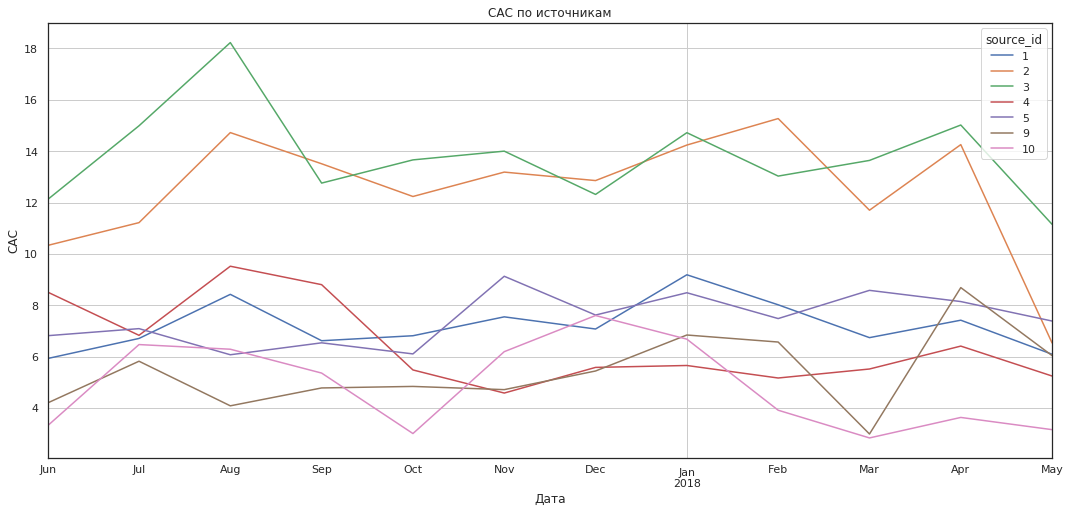

In [101]:
# Построим график зависимости затрат по источникам и времени:
report_orders_cost.pivot_table(index = 'data', columns = 'source_id', values = 'cac', aggfunc = 'mean').plot(grid=True, figsize=(18, 8));

plt.title('САС по источникам');
plt.ylabel('САС');
plt.xlabel('Дата');
plt.show;

**Вывод:**

Наибольшие значения стоимости привлечения покупателей (САС) получились для 2 и 3 рекламного источника. Максимальное значение САС было у когорты "август 2017г." по источнику № 3 и составило 18,23.

<a id='step_2.3.3'></a>

**2.3.3 На сколько окупились расходы? (ROI)**

Для того, чтобы найти ROMI (возврат на маркетинговые инвестиции) по источникам, нужно найти LTV по источникам и поделить на САС.

In [102]:
report_orders_cost['gp'] = report_orders_cost['revenue'] * margin_rate
report_orders_cost['ltv'] = report_orders_cost['gp'] / report_orders_cost['n_buyers']
report_orders_cost

,data,source_id,costs,n_buyers,revenue,cac,gp,ltv
0,2017-06-01,1,1125.61,190,6392.39,5.924263,6392.39,33.644158
1,2017-06-01,2,2427.38,235,3915.26,10.329277,3915.26,16.660681
2,2017-06-01,3,7731.65,638,3640.32,12.118574,3640.32,5.705831
3,2017-06-01,4,3514.80,413,4992.67,8.510412,4992.67,12.088789
4,2017-06-01,5,2616.12,384,4377.64,6.812813,4377.64,11.400104
...,...,...,...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,3256.54,11.150972,3256.54,3.858460
80,2018-05-01,4,4214.21,804,3802.91,5.241555,3802.91,4.729988
81,2018-05-01,5,3669.56,497,2094.04,7.383421,2094.04,4.213360
82,2018-05-01,9,362.17,60,223.05,6.036167,223.05,3.717500


In [103]:
# Визуализируем полученные данные в виде сводной таблицы:
report_orders_cost_ltv = report_orders_cost.pivot_table(
        index='data', 
        columns='source_id', 
        values='ltv', 
        aggfunc='mean').round(2)
report_orders_cost_ltv.fillna('')

source_id,1,2,3,4,5,9,10
data,,,,,,,
2017-06-01,33.64,16.66,5.71,12.09,11.40,6.94,2.54
2017-07-01,20.89,11.33,7.35,6.28,6.78,7.04,3.65
2017-08-01,18.68,8.31,6.14,6.48,10.12,5.93,5.65
2017-09-01,10.42,26.70,6.89,7.71,26.17,9.67,2.64
2017-10-01,8.38,12.51,5.72,5.14,6.04,7.03,2.85
2017-11-01,10.17,9.72,4.99,6.76,5.21,4.53,5.08
2017-12-01,5.55,37.04,4.74,4.56,5.31,4.75,3.99
2018-01-01,7.03,7.74,4.56,4.09,5.31,3.31,3.18
2018-02-01,6.12,6.64,4.25,4.26,4.47,5.05,2.59


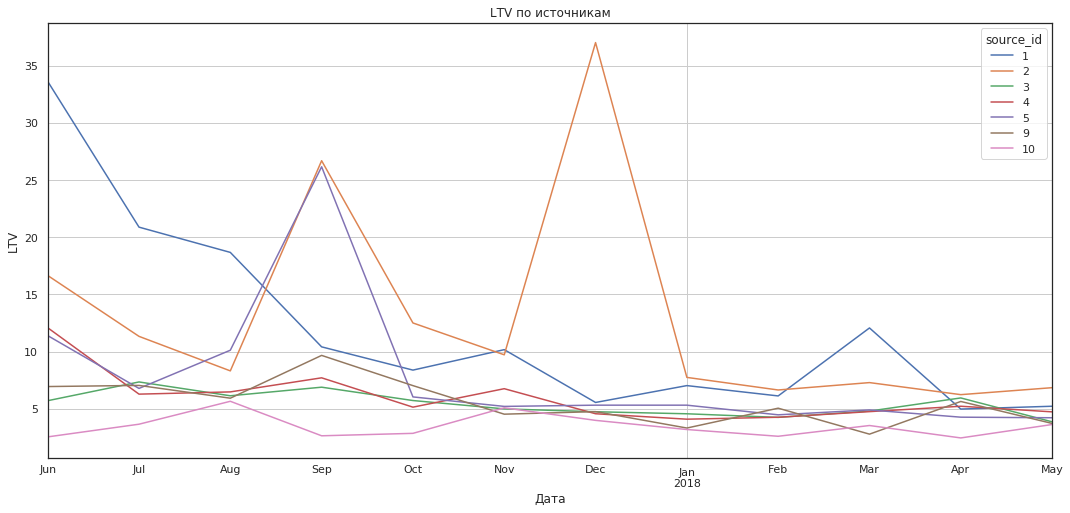

In [104]:
# Построим график зависимости LTV по источникам и времени:
report_orders_cost.pivot_table(index = 'data', columns = 'source_id', values = 'ltv', aggfunc = 'mean').plot(grid=True, figsize=(18, 8));

plt.title('LTV по источникам');
plt.ylabel('LTV');
plt.xlabel('Дата');
plt.show;

In [105]:
report_orders_cost['romi'] = report_orders_cost['ltv'] / report_orders_cost['cac']
report_orders_cost

,data,source_id,costs,n_buyers,revenue,cac,gp,ltv,romi
0,2017-06-01,1,1125.61,190,6392.39,5.924263,6392.39,33.644158,5.679045
1,2017-06-01,2,2427.38,235,3915.26,10.329277,3915.26,16.660681,1.612957
2,2017-06-01,3,7731.65,638,3640.32,12.118574,3640.32,5.705831,0.470834
3,2017-06-01,4,3514.80,413,4992.67,8.510412,4992.67,12.088789,1.420471
4,2017-06-01,5,2616.12,384,4377.64,6.812813,4377.64,11.400104,1.673333
...,...,...,...,...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,3256.54,11.150972,3256.54,3.858460,0.346020
80,2018-05-01,4,4214.21,804,3802.91,5.241555,3802.91,4.729988,0.902402
81,2018-05-01,5,3669.56,497,2094.04,7.383421,2094.04,4.213360,0.570652
82,2018-05-01,9,362.17,60,223.05,6.036167,223.05,3.717500,0.615871


In [106]:
# Визуализируем полученные данные в виде сводной таблицы:
report_orders_cost_romi = report_orders_cost.pivot_table(
        index='data', 
        columns='source_id', 
        values='romi', 
        aggfunc='mean')
report_orders_cost_romi.fillna('')

source_id,1,2,3,4,5,9,10
data,,,,,,,
2017-06-01,5.679045,1.612957,0.470834,1.420471,1.673333,1.655389,0.767806
2017-07-01,3.115465,1.010484,0.490078,0.919793,0.956550,1.210352,0.564308
2017-08-01,2.217785,0.564695,0.336612,0.680281,1.667562,1.451974,0.899557
2017-09-01,1.574257,1.976551,0.539898,0.875832,4.004988,2.024012,0.491957
2017-10-01,1.230737,1.022289,0.418730,0.938349,0.989198,1.452487,0.949365
2017-11-01,1.347875,0.737183,0.356397,1.475637,0.570403,0.960684,0.821205
2017-12-01,0.784944,2.881190,0.384783,0.818265,0.697736,0.873416,0.524464
2018-01-01,0.764946,0.543889,0.309861,0.723333,0.626210,0.484538,0.476813
2018-02-01,0.763854,0.435030,0.325942,0.824323,0.597625,0.769139,0.663409


In [107]:
# Визуализируем результаты ROMI на тепловой карте:
#plt.figure(figsize=(18, 9))
#plt.title('ROMI')
#sns.heatmap(report_orders_cost_romi, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap="Blues");

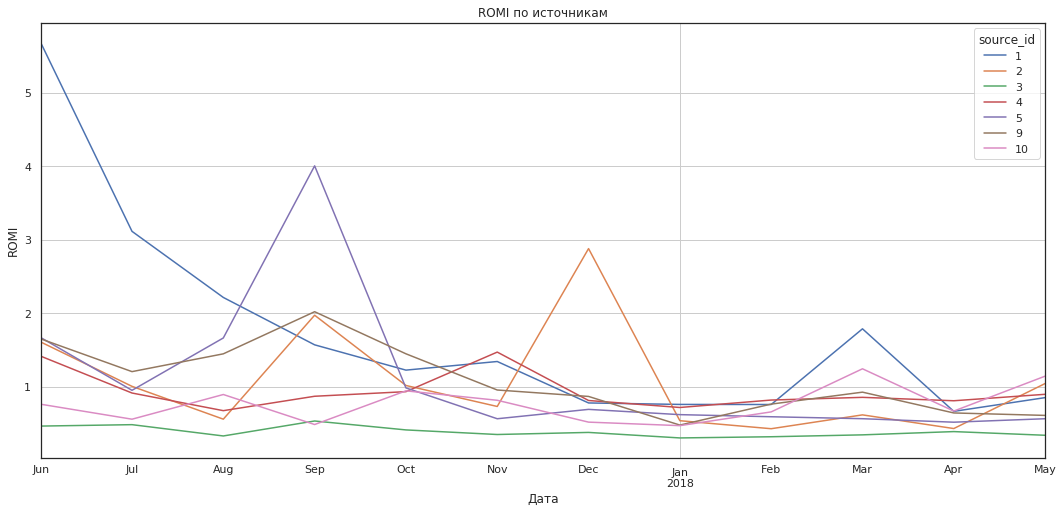

In [108]:
# Построим график зависимости ROMI по источникам и времени:
report_orders_cost.pivot_table(index = 'data', columns = 'source_id', values = 'romi', aggfunc = 'mean').plot(grid=True, figsize=(18, 8));

plt.title('ROMI по источникам');
plt.ylabel('ROMI');
plt.xlabel('Дата');
plt.show;

**Вывод:**
Рассчитали значения LTV и ROMI по типам рекламных источников.

1. **По LTV:** 
Больше всего денег для первой (июнь 2017г.), второй(июль 2017г.) и третьей(август 2017г.) когорты принем источник №1, в четвертой(сентябрь 2017г.) когорте больше денег принесли рекламные источники №2 и №5. Для седьмой(декабрь 2017 г.) когорты  самый большой LTV у рекламного источника №2.
Почти у всех когорт меньше всего денег принели источники 9 и 10.


2. **ROMI:** Затраты на рекламу окупились у следующих когорт:

    * В первой (июнь 2017г.) когорте затраты окупились по всем источникам, кроме 3 и 10.
    * Во второй (июль 2017г.) когорте затраты окупились у 1, 2 и 9 источников.
    * В третьей (август 2017г.) когорте затраты окупились только у 1, 5 и 9 источников.
    * В четвертой (сентябрь 2017г.) когорте затраты окупились только у 1, 2, 5 и 9 источников.
    * В пятой (октябрь 2017г.) когорте затраты окупились только у 1, 2 и 9 источников.
    * В шестой (ноябрь 2017г.) когорте затраты окупились только у 1 и 4  источников.
    * В седьмой (декабрь 2017г.) когорте затраты окупились только у 2 источника.
    * В восьмой (январь 2018г.) и девятой (февраль 2018г.) когортах затраты не окупились ни по одному источнику.
    * В десятой (март 2018г.) когорте затраты окупились только у 1 и 10  источника.
    * В одиннадцатой (апрель 2018г.) когорте затраты не окупились ни по одному источнику.
    * В двенадцатой (май 2018г.) когорте затраты окупились только у 2 и 10 источника.

<a id='step_2.3.4'></a>

**2.3.4 Выводы:**

1. Определили, что суммарные затраты на рекламу за весь период составили 329131,62. Также расчитали затраты на рекламу по месяцам. Самые высокие затраты на рекламу были в декабре 2017г. - 38315,35. Средние затраты на рекламу в месяц за весь период составили 27427,63. Определили затраты по источникам за весь период и в разбивке по месяцам. В целом, за весь рассмтриваемый период самые большие затраты были по источнику № 3 и составили 141321,63.


2. Расчитали стоимости привлечения покупателей (САС) по источникам. Наибольшие значения стоимости привлечения покупателей получились для 2 и 3 рекламного источника. Максимальное значение САС было у когорты "август 2017г." по источнику № 3 и составило 18,23.


3. Рассчитали значения LTV и ROMI по типам рекламных источников.

    **По LTV:** Больше всего денег для первой (июнь 2017г.), второй(июль 2017г.) и третьей(август 2017г.) когорты принес источник №1, в четвертой(сентябрь 2017г.) когорте больше денег принесли рекламные источники №2 и №5. Для седьмой(декабрь 2017 г.) когорты  самый большой LTV у рекламного источника №2.
    Почти у всех когорт меньше всего денег принели источники 9 и 10.
    
    **ROMI:** Затраты на рекламу окупились у следующих когорт и источников:

    * В первой (июнь 2017г.) когорте затраты окупились по всем источникам, кроме 3 и 10.
    * Во второй (июль 2017г.) когорте затраты окупились у 1, 2 и 9 источников.
    * В третьей (август 2017г.) когорте затраты окупились только у 1, 5 и 9 источников.
    * В четвертой (сентябрь 2017г.) когорте затраты окупились только у 1, 2, 5 и 9 источников.
    * В пятой (октябрь 2017г.) когорте затраты окупились только у 1, 2 и 9 источников.
    * В шестой (ноябрь 2017г.) когорте затраты окупились только у 1 и 4  источников.
    * В седьмой (декабрь 2017г.) когорте затраты окупились только у 2 источника.
    * В десятой (март 2018г.) когорте затраты окупились только у 1 и 10  источника.
    * В двенадцатой (май 2018г.) когорте затраты окупились только у 2 и 10 источника.
    * А в восьмой (январь 2018г.), девятой (февраль 2018г.) и одиннадцатой (апрель 2018г.) когортах затраты не окупились ни по одному источнику.

<a id='step_3'></a>

## 3. Выводы и порекомендации маркетологам:

**Основные выводы:**

1. Проанализировали данные о визитах пользователей на сайте Я.Афиша, мы получили следующие данные:
    - Среднее количество уникальных пользователей в день (DAU) равно 907. 
    - Среднее количество уникальных пользователей в недель (WAU) равно 5716. 
    - Среднее количество уникальных пользователей в месяц (MAU) - 23228.
    - Большая часть пользователей приходит на сайт Я.Афиша с desktop устройств.
    - Больше всего пользователей приходят на сайт с 4, 3 и 5 рекламных источников.
    - Недельные и месячные коэффициенты “прилипаемости” (sticky factor) пользователей к сайту Я.Афиша достаточно низкие: sticky_mau = 3,9% и sticky_wau = 15,9%. 
    - В среднем на одного пользователя приходится 1.08 сессий в день.
    - Средняя продолжительность сессии (ASL) большинства пользователей на сайте Я.Афиша длится 60 секунд.
    - **Retention Rate** в первый месяц резко снижается по всем когортам. С каждой новой когортой поведение покупателей практически не меняется. В первой когорте (июнь 2017г.) на третий "месяц жизни" начинает незначительно расти на протяжении трех месяцев, но затем снова падает, и в последний 11-ый "месяц жизни" незначительно вырос. Во второй когорте (от июля 2017 г.) был незначительный рост на третий и четвертый "месяц жизни". В третьей когорте (август 2017 г.) был незначительный рост на 7-ой "месяц жизни". Незначительный рост, наблюдамый в первых трех когортах в разные месяцы их жизни, может быть связан, в целом, с более длительным сроком жизни этих покупателей. Для всех остальных когорт каждый последующий "месяц жизни" Retention Rate падает. В целом, по всем когортам коэффициент удержания в первый месяц жизни составляет от 4,2 до 8,5%. Это говорит о том, что большая часть пользователей не возвращается на сайт в последующие месяцы.
   Также расчитали Retention Rate по типам устройств и построили тепловые карты. Retention Rate у пользователей с типом устройств desktop немного выше, чем у touch. Пользователи с desktop чаше возвращаются на сайт Я.Афиша.


2. Проанализировали **Продажи** и получили следующие данные:

    - Почти 69% покупателей сайта Я.Афиша делают свою первую покупку в свой первый визит на сайт и 83% покупателей совершают первую покупку в течение первого месяца. Большинство пользователей (61,8%) делают заказ в течение первого часа с начала своего первого визита. В ту же минуту делают заказ - 2455 пользователей, в течение 1ой минуты делают заказ - 2656 пользователей, в течение 2ой минуты - 2098 пользователей.
    - Когортный анализ по месяцам показал, что большинство пользователей совершают покупки в тот же месяц, когда был сделан первый заказ.
    - Средний чек покупателей равен 14.73. Во всех когортах средний чек пользователей возрастает на следующий месяц после месяца первой покупки. Самый большой средний чек был в четвертой когорте (сентябрь 2017г.) на третьем "месяце жизни" после первой покупки и составил 138,67. Для первой, четвертой, шестой и седьмой когорт максимальное значение среднего чека пришлось на третий месяц жизни. Во второй когорте (июль 2017г.) максимальное значение среднего чек было на второй месяц жизни, а в третей когорте (август 2017г.) - на 8 месяц жизни. В седьмой когорте (декабрь 2017г.) на второй и третий месяц жизни был стремительный рост среднего чека. В целом, средний чек покупателей в течение времени жизни у каждой когорты меняется как в сторону роста так и в сторону снижения.
    - Посчитали LTV по когортам и возрасту когорты. Самый высокий показатель LTV у когорты "сентябрь 2017г." - 13,43. Также у этой когорты на третий месяц самый высокий LTV по сравнению с другими когортами (для возраста от 1 до 11). У когорты "июнь 2017г." LTV равен 11,88. Накопительный LTV средней когорты за 11 месяцев после первой покупки составляет 10,01.
    
    
3. Проанализировали расходы на **Маркетинг** и получили следующие данные:
    - Суммарные затраты на рекламу за весь период составили 329131,62. По месяцам самые высокие затраты на рекламу были в декабре 2017г. - 38315,35. В среднем затраты на рекламу в месяц за весь период составили 27427,63. В целом, за весь рассматриваемый период самые большие затраты были по источнику № 3 и составили 141321,63.
    - Расчитали стоимости привлечения покупателей **САС** по источникам. Наибольшие значения стоимости привлечения покупателей получились для 2 и 3 рекламного источника. Максимальное значение САС было у когорты "август 2017г." по источнику № 3 и составило 18,23.
    - **По LTV:** Больше всего денег для первой (июнь 2017г.), второй(июль 2017г.) и третьей(август 2017г.) когорты принес источник №1, в четвертой(сентябрь 2017г.) когорте больше денег принесли рекламные источники №2 и №5. Для седьмой (декабрь 2017 г.) когорты  самый большой LTV у рекламного источника №2. Почти у всех когорт меньше всего денег принесли источники 9 и 10.
    - **ROMI:** Затраты на рекламу окупились у следующих когорт по следующим источникам:
        * В первой (июнь 2017г.) когорте затраты окупились по всем источникам, кроме 3 и 10.
        * Во второй (июль 2017г.) когорте затраты окупились у 1, 2 и 9 источников.
        * В третьей (август 2017г.) когорте затраты окупились только у 1, 5 и 9 источников.
        * В четвертой (сентябрь 2017г.) когорте затраты окупились только у 1, 2, 5 и 9 источников.
        * В пятой (октябрь 2017г.) когорте затраты окупились только у 1, 2 и 9 источников.
        * В шестой (ноябрь 2017г.) когорте затраты окупились только у 1 и 4  источников.
        * В седьмой (декабрь 2017г.) когорте затраты окупились только у 2 источника.
        * В десятой (март 2018г.) когорте затраты окупились только у 1 и 10  источников.
        * В двенадцатой (май 2018г.) когорте затраты окупились только у 2 и 10 источников.
        * А в восьмой (январь 2018г.), девятой (февраль 2018г.) и одиннадцатой (апрель 2018г.) когортах затраты не окупились ни по одному источнику.

**Рекомендации маркетологам:**

1. Анализ показал, что на источник №3 приходится значительная часть затрат (САС), а окупаемость (ROMI) по этому источикам очень низкая, ROMI у всех когорт меньше 1. Вложенные затраты не принесли ожидаемой окупаемости. Рекомендация: снизить затраты на источник №3 или исключить этот источник из рекламы.

2. Второй источник приносит хороший доход (LTV), но при этом также и высокие затраты (CAC) на этот рекламный источник. Рекомендация: более активно продвигать данный рекламный источник или оптимизировать затраты на этот источник (снизить) и посмотреть как это повлияет на окумаемость (ROMI).

3. Источник № 1 в когортах с июня по ноябрь 2017 г. и марте 2018г. имеет очень хорошие показатели ROMI. Реклама их этого источника в целом была эффективна.

4. Источники 6 и 7 не приводят покупателей на сайт. Рекомендации: отказаться от этих рекламных источников. 

5. Источник № 5 (у первых 4х когорт) и источник № 9  (у первых 5и когорт) имеет хорошие показатели ROMI, рекомендация: более активно продвигать эти рекламные источники, возможно в том числе за счет увеличения затрат на эти рекламные источники.